# Glass Identification Dataset

Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Adding column names to the dataframe
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 214
No. of Columns : 11


In [5]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id number', 'Type of glass'], float64: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']}

#### Observations: ####
- **There are int and float data types available in the dataset**

In [6]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    9
int64      2
dtype: int64

#### Observations: ####
- **No. of float datatypes: 9**
- **No. of int datatypes: 2**

### Updating target column per the problem statement

In [7]:
# Per the project problem statement, 
# set an arbitrary cutoff for your dependent variable (Type of glass) at e.g. 5 or higher getting classified as class-'1' 
# and the remaining as class-'0'
# Hence updating the target column "Type of glass" accordingly
# New target column is "Type of glass1"
df["Type of glass1"]=[1 if i>=5 else 0 for i in df["Type of glass"]]
df["Type of glass1"] # updated target column

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type of glass1, Length: 214, dtype: int64

#### Observation:
- **0 - Window glass**
- **1- Non-window glass**

In [8]:
df["Type of glass1"].nunique()#check for the number of classes

2

In [9]:
df["Type of glass1"].unique()#check for the number of classes after upadating column

array([0, 1], dtype=int64)

In [10]:
df["Type of glass1"].value_counts()#check for imbalance in the target column

0    163
1     51
Name: Type of glass1, dtype: int64

In [11]:
df.dtypes["Type of glass1"]#checking the dtype of target variable

dtype('int64')

In [12]:
df.drop("Type of glass",axis=1,inplace=True)  # Dropping original target column "Type of glass"
df.head(5)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


# Data Integrity Check

### Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [13]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

#### Observations:
- **No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe**

### Duplicate Values Check

In [14]:
df.duplicated().sum()

0

In [15]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1


#### Observations: 
- **No duplicate values present in the dataframe**

### Null Values Handling

In [16]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

0

#### Observations: 
- **No null values present in the dataframe**

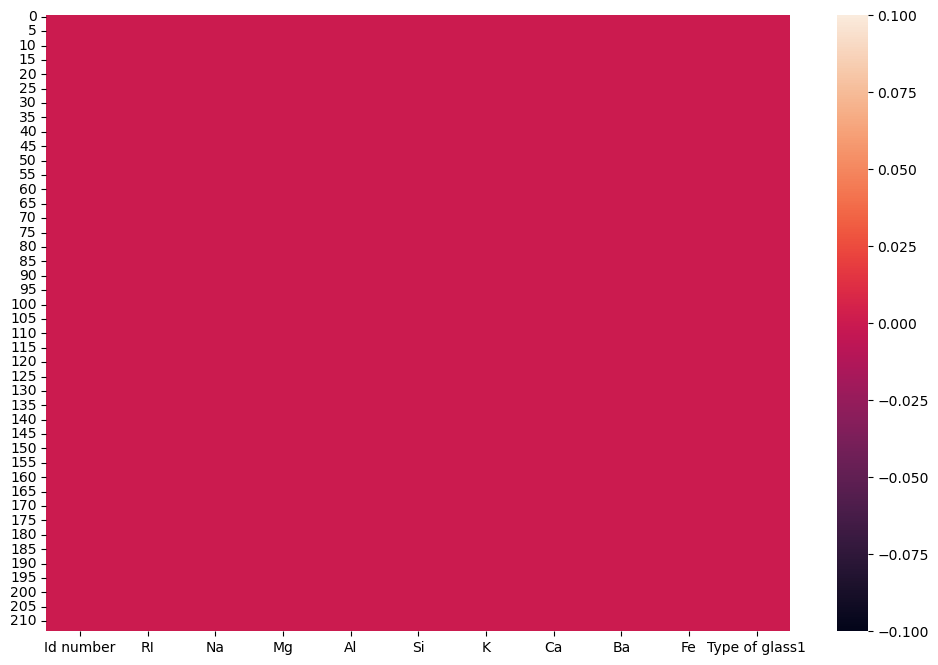

In [17]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())
plt.show()

# Segregating columns based on data type for better EDA

In [18]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id number', 'Type of glass1'], float64: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']}

In [19]:
# Find continuous variables
continuous = [var for var in df.columns if df[var].dtype=='float']
print('There are {} continuous variables\n'.format(len(continuous)))
print('The continuous variables are :', continuous)
x=df[continuous]

There are 9 continuous variables

The continuous variables are : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


In [20]:
# Dropping unneccessary column 'Id number' as it will not contribute to model training
df.drop(['Id number'],axis=1,inplace=True)

In [21]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass1
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [22]:
# Renaming Target Column
df.rename(columns = {'Type of glass1':'Type of glass'}, inplace = True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [23]:
y=df["Type of glass"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

# Statistical Summary:

In [24]:
x.describe().T  # Statistical summary for continuous data

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


#### Observations:
- **count is same for all columns. Hence no null values are present**
- **mean>median for RI, Na,Al,Ca,Ba,Fe.Hence,data is rightskewed**
- **mean<median for Mg,K.Hence,data is leftskewed**
- **large variation between 75% and max for K,Ca indicates outliers**
- **less variation between 75% and max for Na,Ba indicates less number of outliers**
- **standard deviation is not high.It indicates the dataspread is low.i.e,range is less**

# Visualization of data

### Univariate Graphical Analysis

Minimum RI is 1.51115 % and Maximum RI is 1.53393 %
Minimum Na is 10.73 % and Maximum Na is 17.38 %


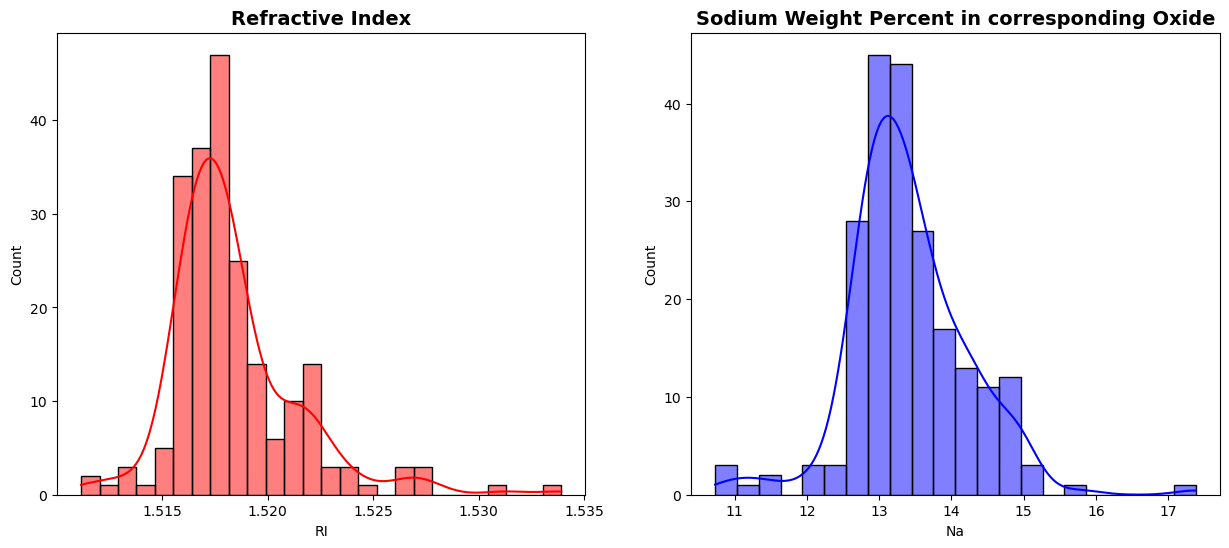

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['RI'],kde=True,color='r')
plt.title('Refractive Index',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Na'],kde=True,color='b')
plt.title('Sodium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum RI is {} % and Maximum RI is {} %'.format(x['RI'].min(),x['RI'].max()))
print('Minimum Na is {} % and Maximum Na is {} %'.format(x['Na'].min(),x['Na'].max()))
plt.show()

#### Observations:
- **Both the columns are not normally distributed. The building blocks are out of the normalized curve.**
- **Both features are having right skewed data**
- **Data spread is less in Refractive Index where as it is high in "Sodium weight percent**

Minimum Mg is 0.0 % and Maximum Mg is 4.49 %
Minimum Al is 0.29 % and Maximum Al is 3.5 %


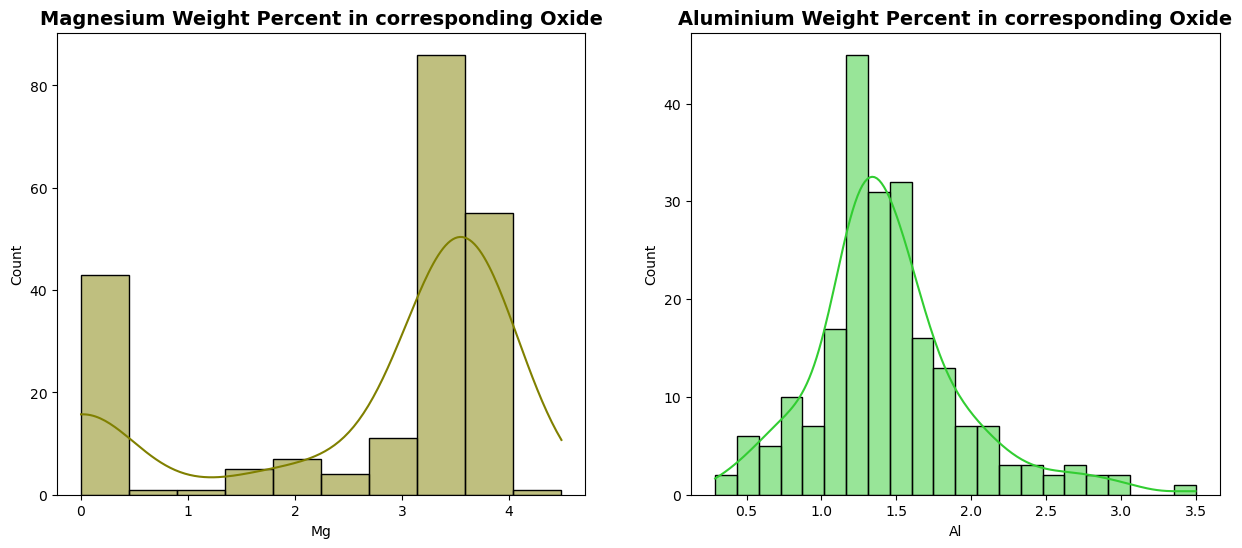

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Mg'],kde=True,color='olive')
plt.title('Magnesium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Al'],kde=True,color='limegreen')
plt.title('Aluminium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Mg is {} % and Maximum Mg is {} %'.format(x['Mg'].min(),x['Mg'].max()))
print('Minimum Al is {} % and Maximum Al is {} %'.format(x['Al'].min(),x['Al'].max()))
plt.show()

#### Observations:
- **Both the columns are not normally distributed. The building blocks are out of the normalized curve.**
- **"Magnesium" is having left skewed data and "Aluminium is having right skewed data**
- **Data spread is less in both features**

Minimum Si is 69.81 % and Maximum Si is 75.41 %
Minimum K is 0.0 % and Maximum K is 6.21 %


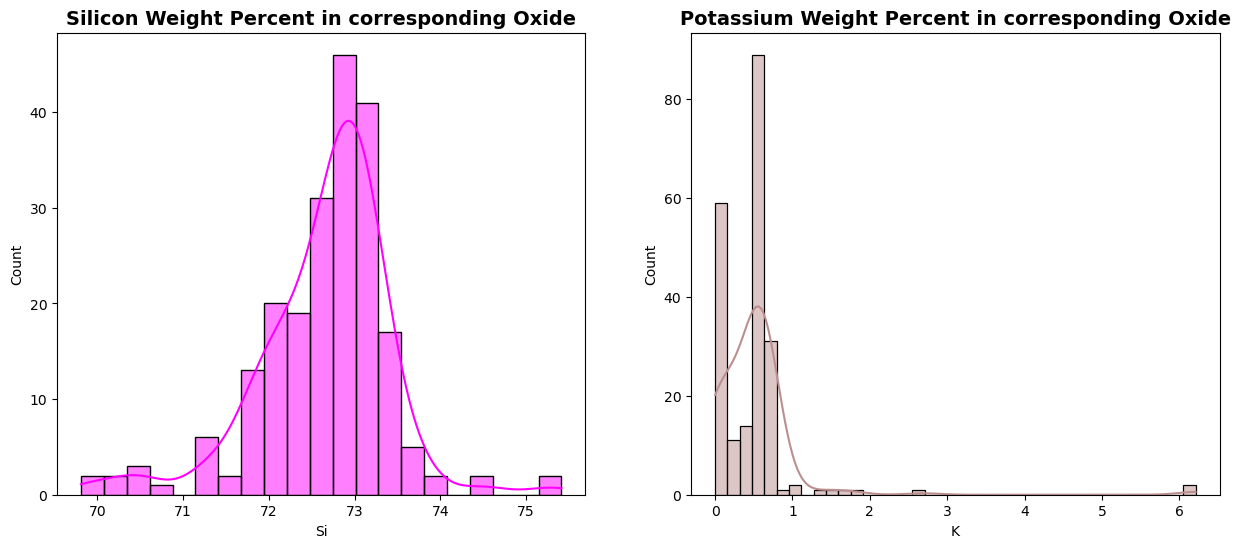

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Si'],kde=True,color='magenta')
plt.title('Silicon Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['K'],kde=True,color='rosybrown')
plt.title('Potassium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Si is {} % and Maximum Si is {} %'.format(x['Si'].min(),x['Si'].max()))
print('Minimum K is {} % and Maximum K is {} %'.format(x['K'].min(),x['K'].max()))
plt.show()

#### Observations:
- **Both the columns are not normally distributed. The building blocks are out of the normalized curve.**
- **"Silicon" is having left skewed data where as "Potassium" is having right skewed data**
- **Data spread is small in both features**

Minimum Ca is 5.43 % and Maximum Ca is 16.19 %
Minimum Ba is 0.0 % and Maximum Ba is 3.15 %


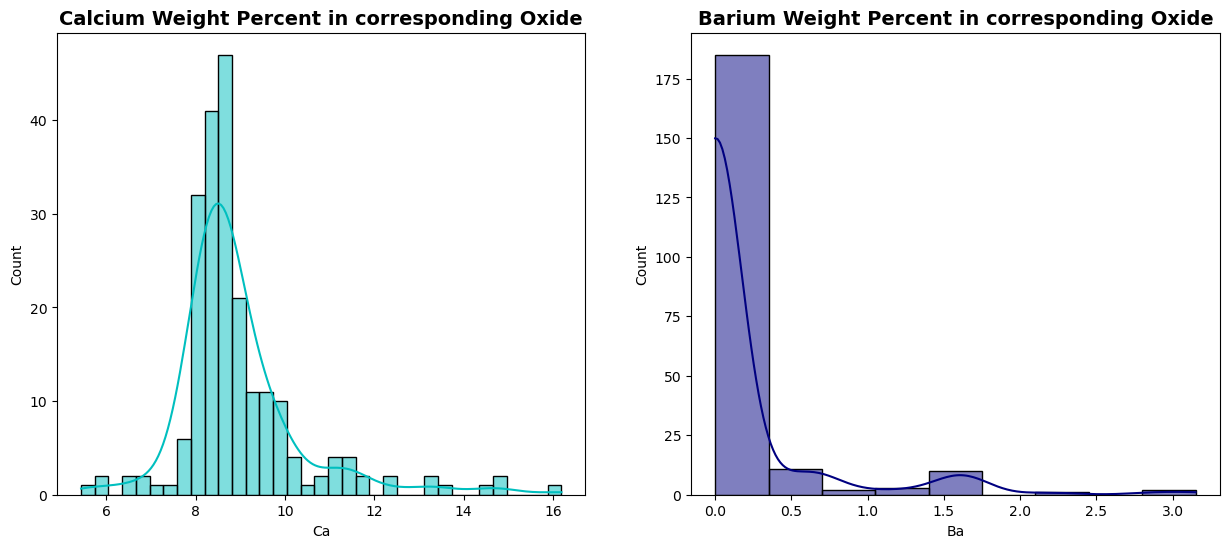

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x['Ca'],kde=True,color='c')
plt.title('Calcium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(x['Ba'],kde=True,color='navy')
plt.title('Barium Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Ca is {} % and Maximum Ca is {} %'.format(x['Ca'].min(),x['Ca'].max()))
print('Minimum Ba is {} % and Maximum Ba is {} %'.format(x['Ba'].min(),x['Ba'].max()))
plt.show()

#### Observations:
- **Both the columns are not normally distributed. The building blocks are out of the normalized curve.**
- **Both features are having right skewed data**
- **Data spread is high in "Calcium" where as it is less in "Barium"

Minimum Fe is 0.0 % and Maximum Fe is 0.51 %


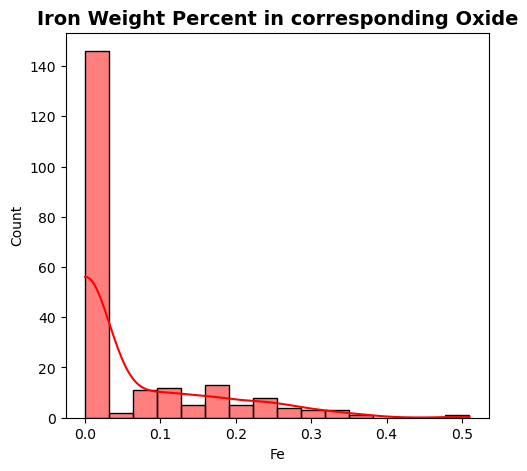

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x['Fe'],kde=True,color='r')
plt.title('Iron Weight Percent in corresponding Oxide',fontsize=14, fontweight='bold')
print('Minimum Fe is {} % and Maximum Fe is {} %'.format(x['Fe'].min(),x['Fe'].max()))
plt.show()

#### Observations:
- **"Iron" column is not normally distributed. The building blocks are out of the normalized curve.**
- **It is having right skewed data**
- **Data spread is less**

### Bivariate Graphical Analysis

- **Studying the relationship of all features with target variable**

<Figure size 1200x700 with 0 Axes>

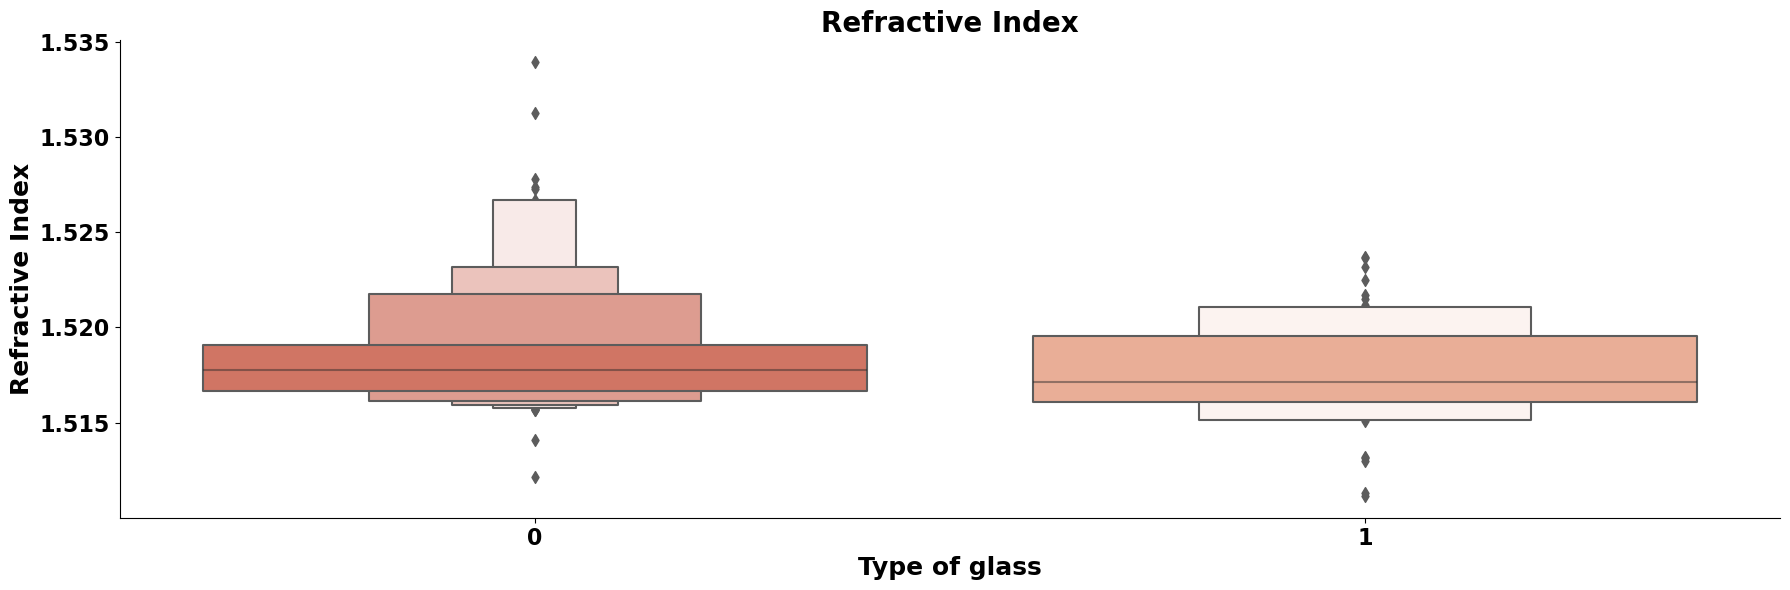

In [30]:
#0 - Window glass
#1- Non-window glass

plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y='RI',data= df,
            kind="boxen",height=6, aspect=3)
plt.title("Refractive Index",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Refractive Index', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Majority of both window and non-window glasses are having refrative index in the range between 1.515 and 1.520**
- **Refractive index is higher in window glasses compared to non-window glasses**

<Figure size 1200x700 with 0 Axes>

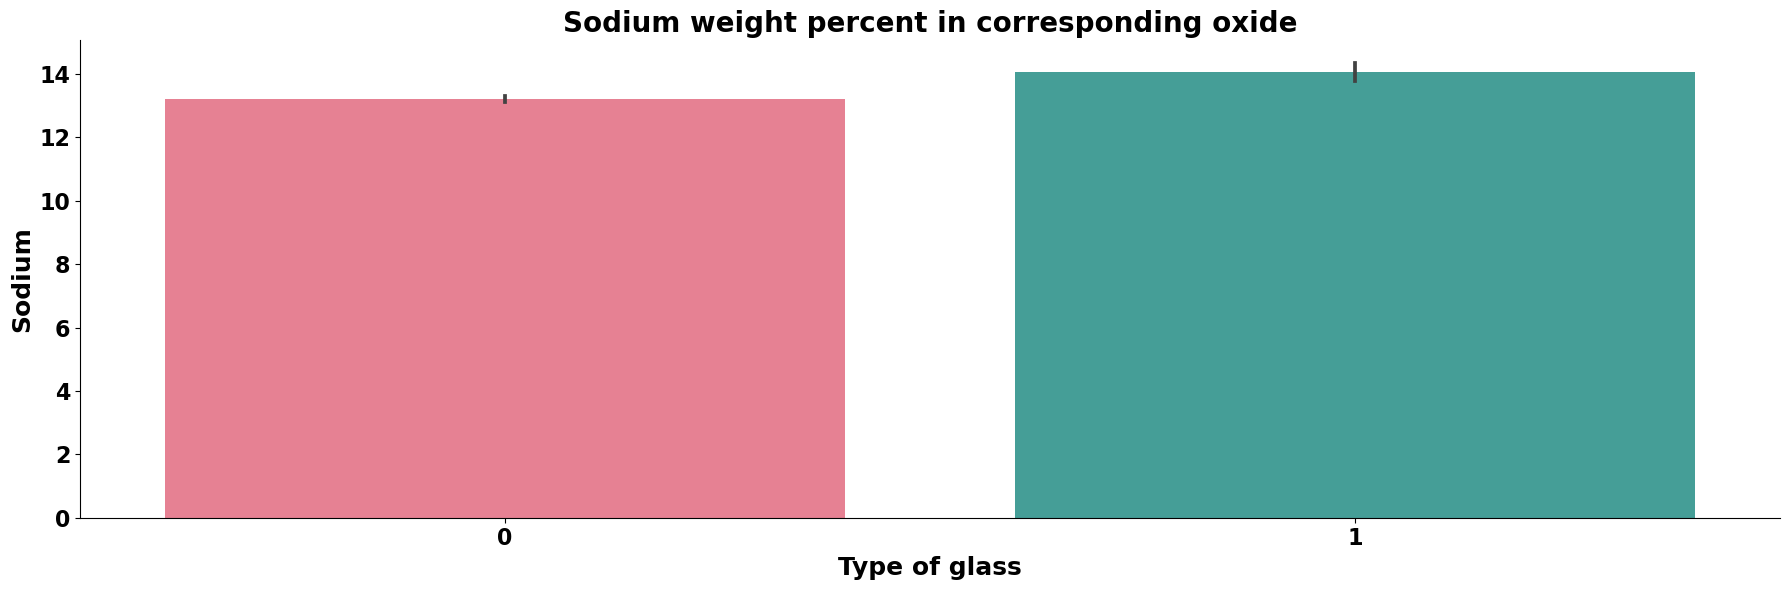

In [31]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y='Na',data= df,
            kind="bar",height=6, aspect=3,palette='husl')
plt.title("Sodium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Sodium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Sodium percent is almost similar in both type of glasses**

<Figure size 1200x700 with 0 Axes>

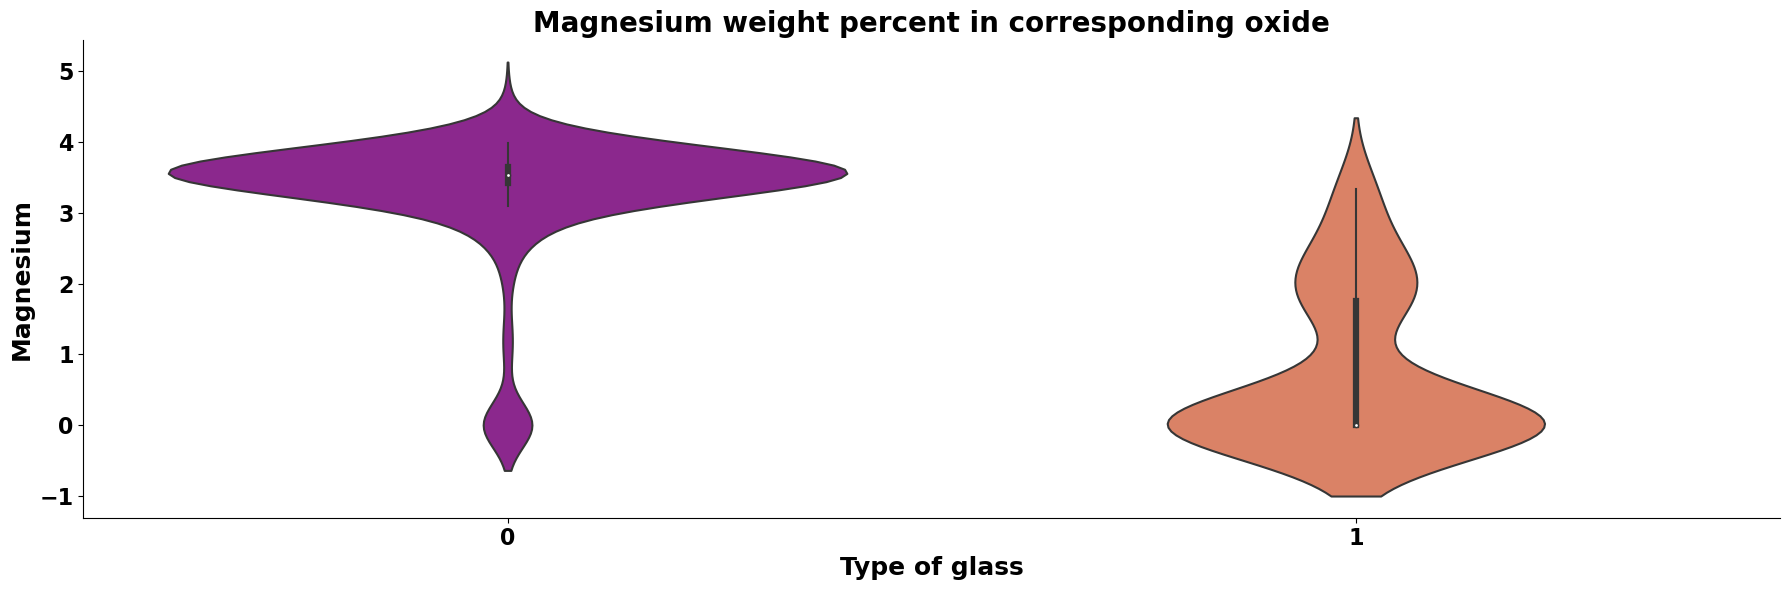

In [32]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[2],data= df,
            kind="violin",height=6, aspect=3,palette='plasma')
plt.title("Magnesium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Magnesium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Majority of window glasses are having "Magnesium" content in the range between 3 to 4**
- **Majority of non-window glasses are not having "Magnesium" content**
- **No. of window glasses with "Magnesium" are high compared to non-window glasses**

<Figure size 1200x700 with 0 Axes>

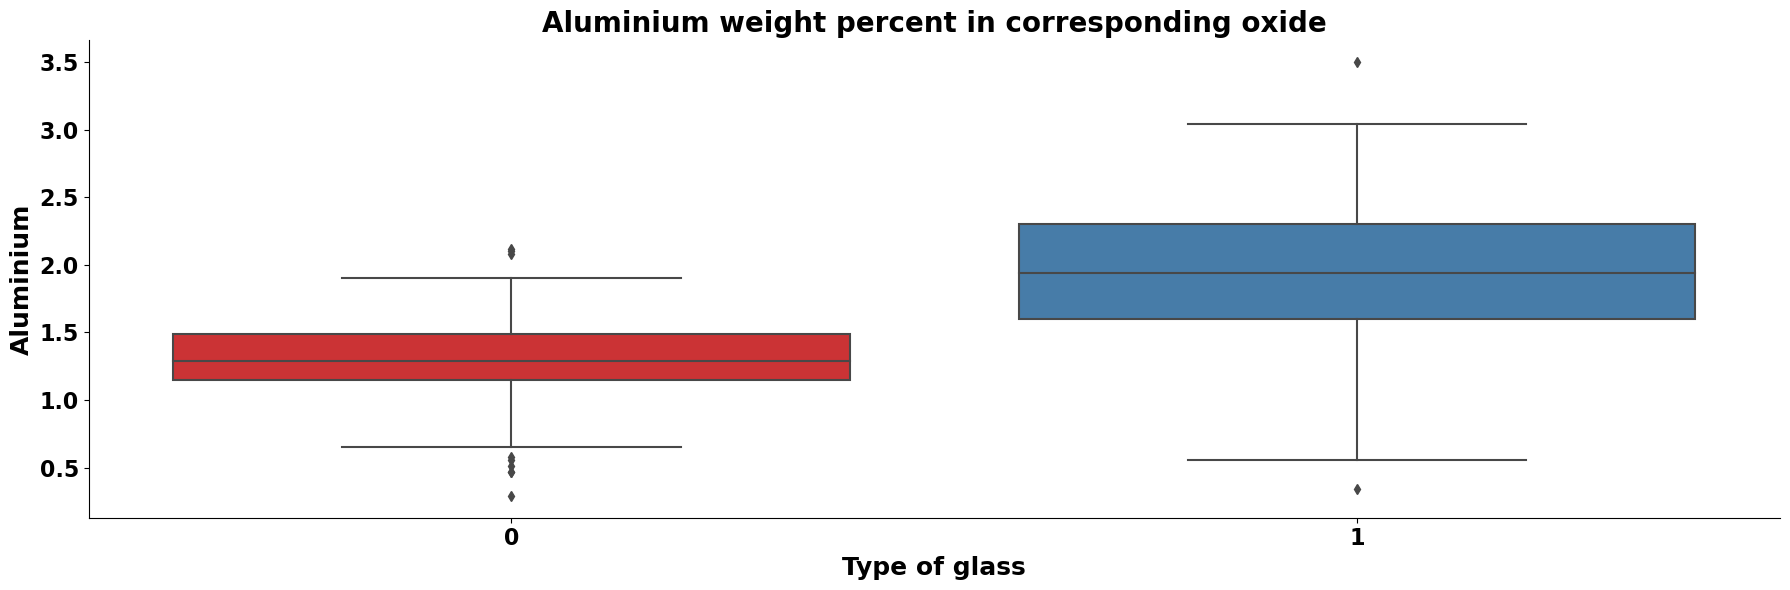

In [33]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[3],data= df,
            kind="box",height=6, aspect=3,palette='Set1')
plt.title("Aluminium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Aluminium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **There are large number of non-window glasses with "Aluminium" content compared to window-glasses**
- **Majority of window glasses are having "Aluminium" content in the range between 1 to 1.5**
- **Majority of non-window glasses are having "Aluminium" content in the range between 1.5 to 2.5**

<Figure size 1200x700 with 0 Axes>

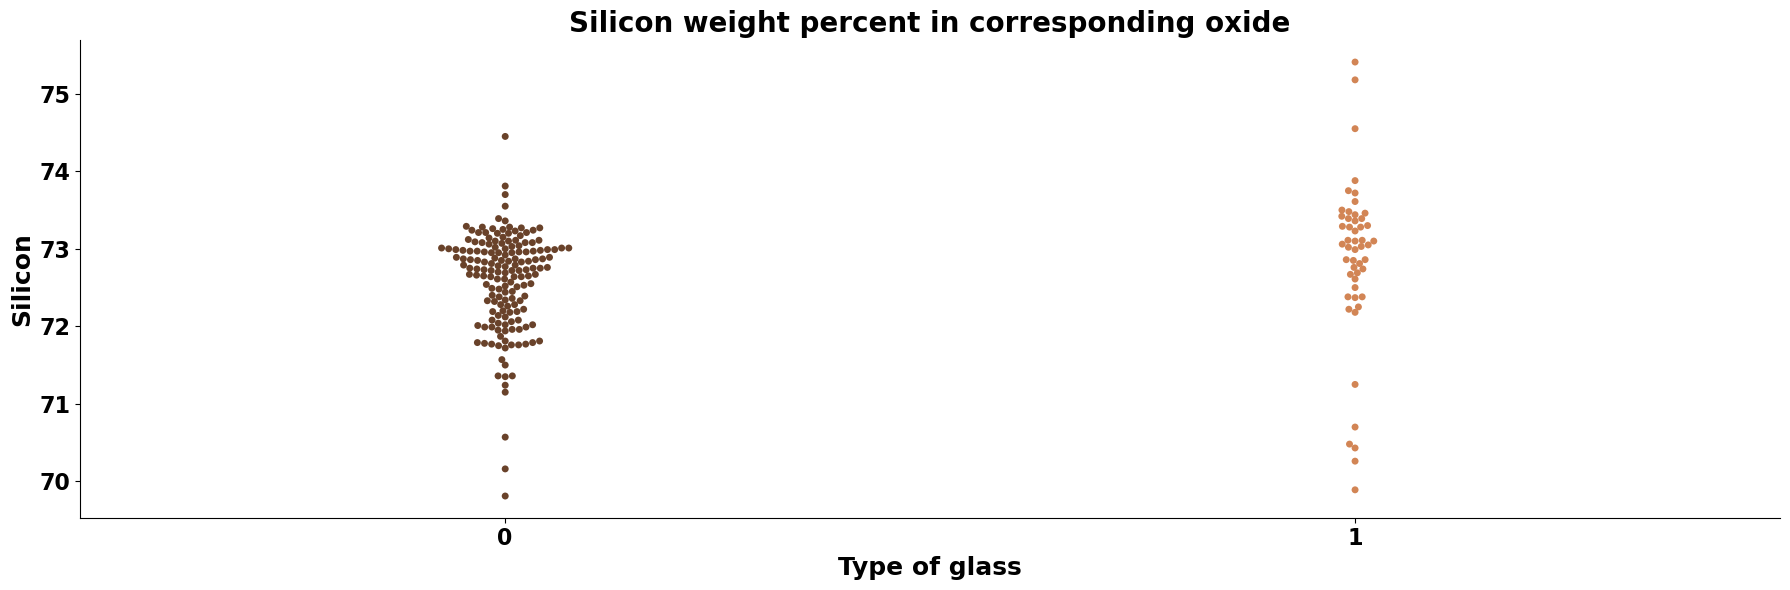

In [34]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[4],data= df,
            kind="swarm",height=6, aspect=3,palette='copper')
plt.title("Silicon weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Silicon', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **There are large number of window glasses with "Silicon" content compared to non-window-glasses**
- **Majority of window glasses are having "Silicon" content in the range between 71.5 to 73.5**
- **Majority of non-window glasses are having "Silicon" content in the range between 72 to 73**

<Figure size 1200x700 with 0 Axes>

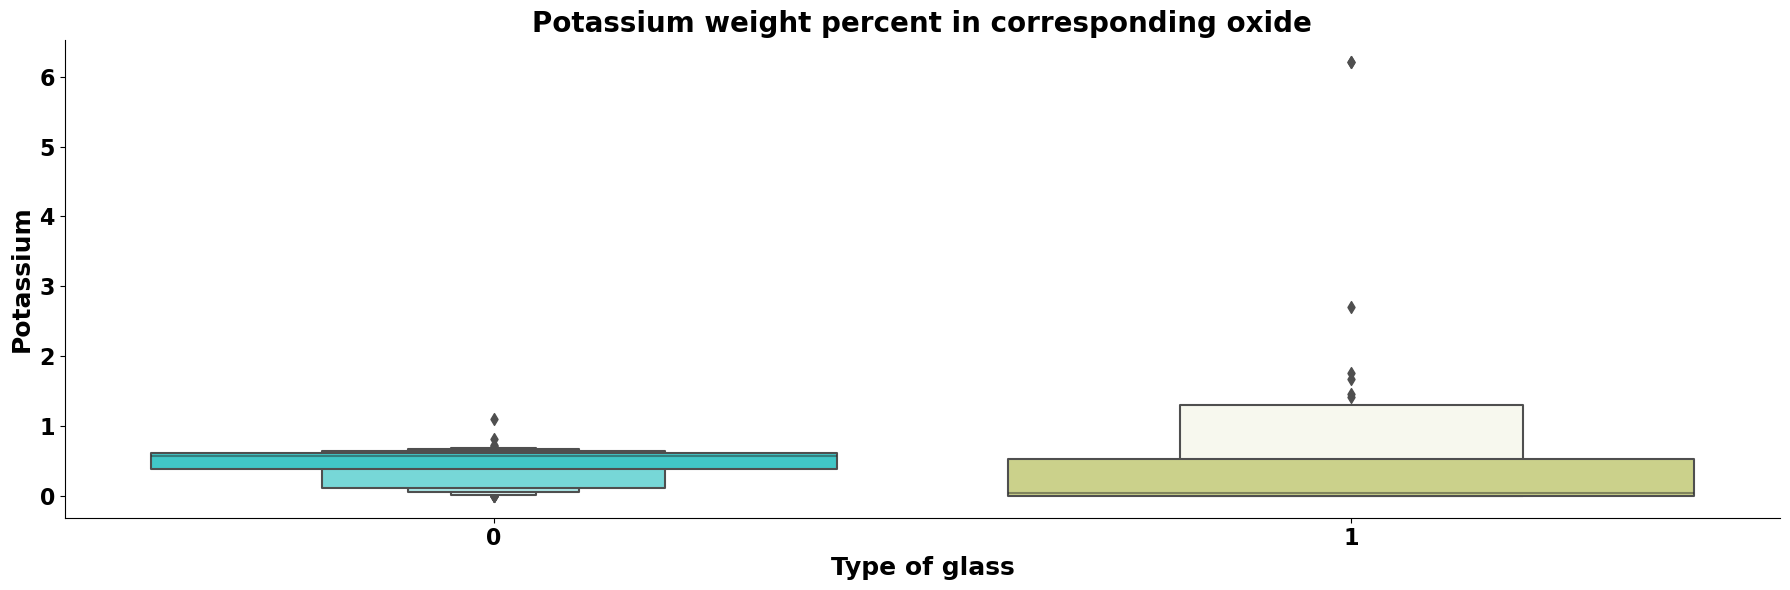

In [35]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[5],data= df,
            kind="boxen",height=6, aspect=3,palette='rainbow')
plt.title("Potassium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Potassium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **Looks like both type of glasses are not having much potassium content however there are someoutliers exist in non-window glasses**

<Figure size 1200x700 with 0 Axes>

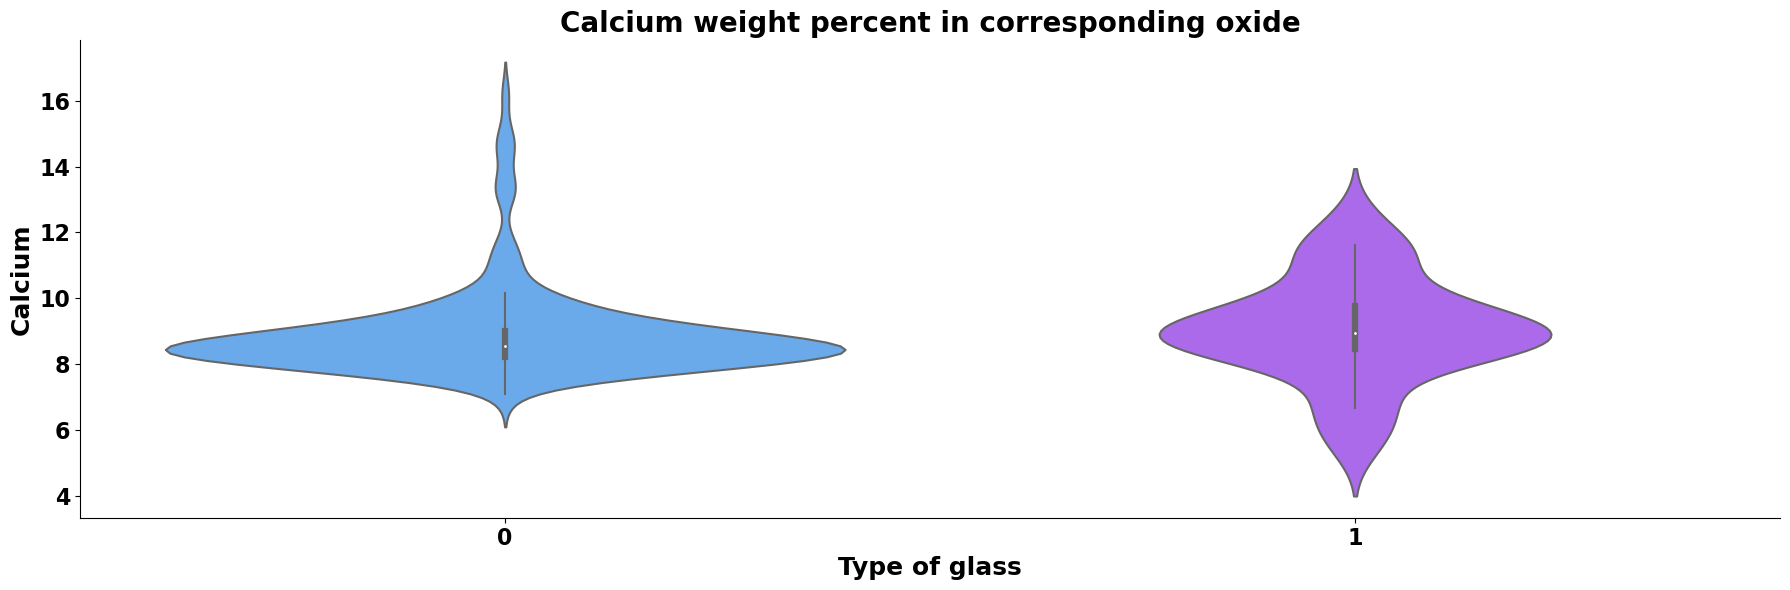

In [36]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[6],data= df,
            kind="violin",height=6, aspect=3,palette='cool')
plt.title("Calcium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Calcium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **There are large number of window glasses with "Calcium" content compared to non-window-glasses**
- **Majority of both window and non-window glasses are having "Calcium" content in the range between 7 to 9**
- **There are few window glasses with "Calcium" content above 10**

<Figure size 1200x700 with 0 Axes>

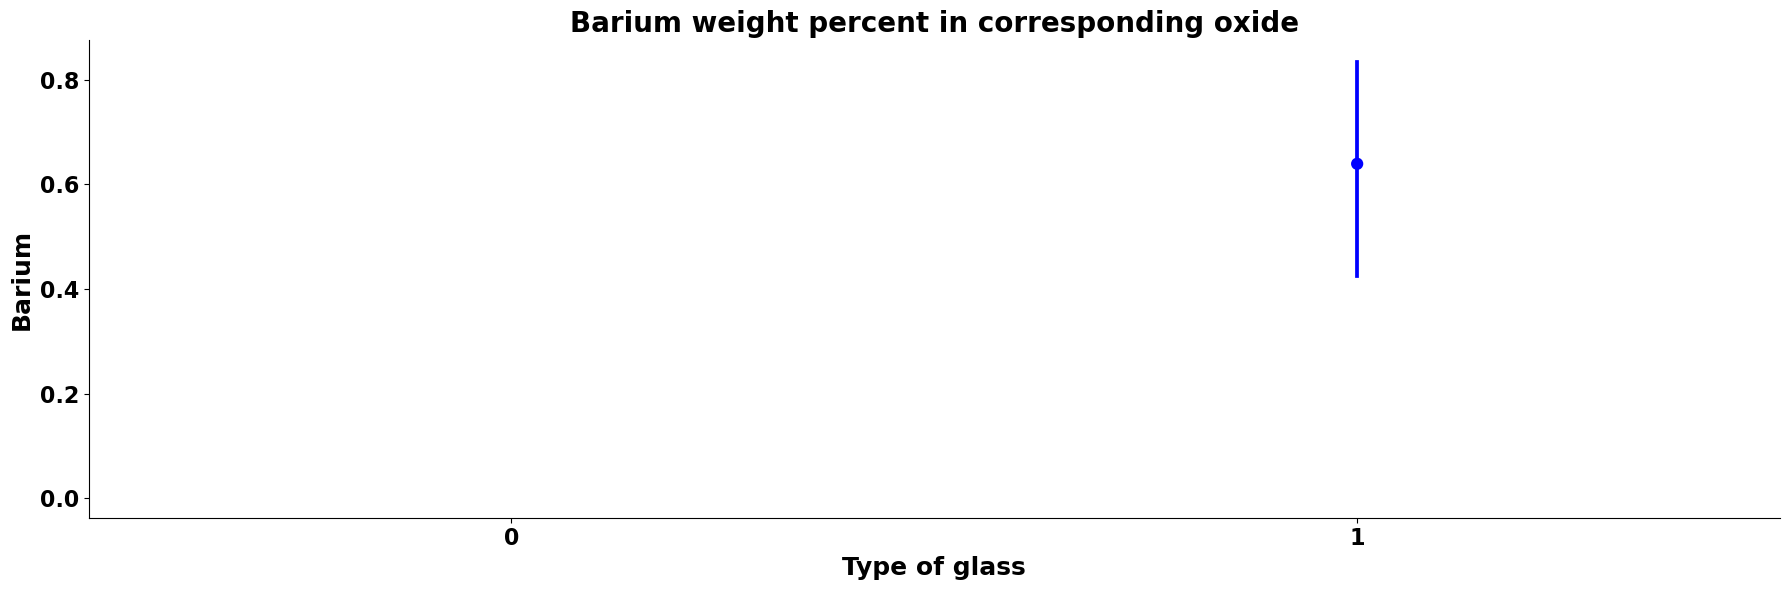

In [37]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[7],data= df,
            kind="point",height=6, aspect=3,palette='flag')
plt.title("Barium weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Barium', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **There are no window glasses with "Barium" content and only there are non-window glasses are available with "Barium" content**
- **Barium range with non-window glasses is in between 0.4 to 0.8**

<Figure size 1200x700 with 0 Axes>

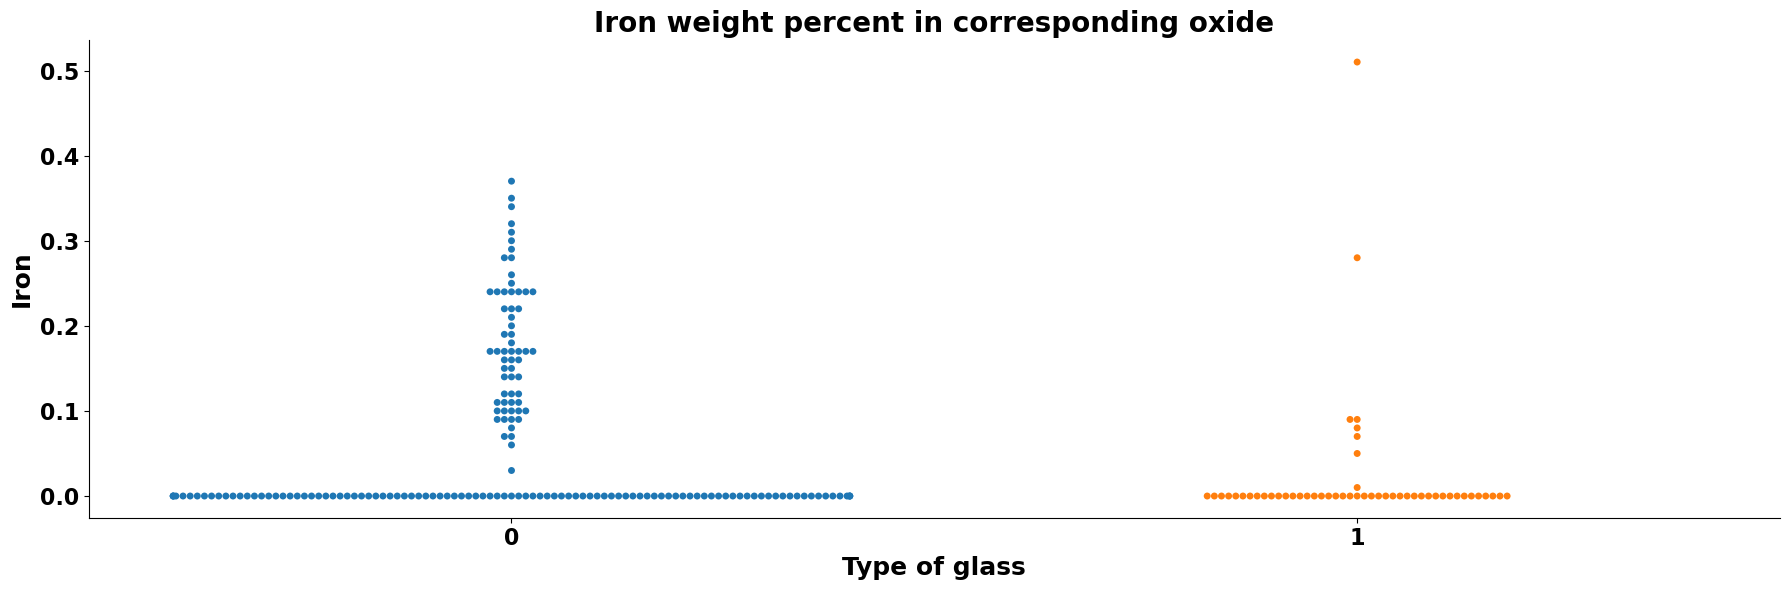

In [38]:
plt.figure(figsize=(12,7))
sns.catplot(x='Type of glass',y=df.columns[8],data= df,
            kind="swarm",height=6, aspect=3,palette='tab10')
plt.title("Iron weight percent in corresponding oxide",fontsize=20, fontweight='bold')
plt.xlabel('Type of glass', fontsize=18,fontweight='bold')
plt.ylabel('Iron', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
- **There are large number of window glasses with "Iron" content compared to non-indow-glasses**
- **Interestingly there are multiple glasses in both window and non-window categories don't have any "Iron" content**
- **Max "Iron" percent range is upto 0.4 for window glasses***
- **There are outliers in non-window glass category**

### Multivariate Graphical Analysis

In [39]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

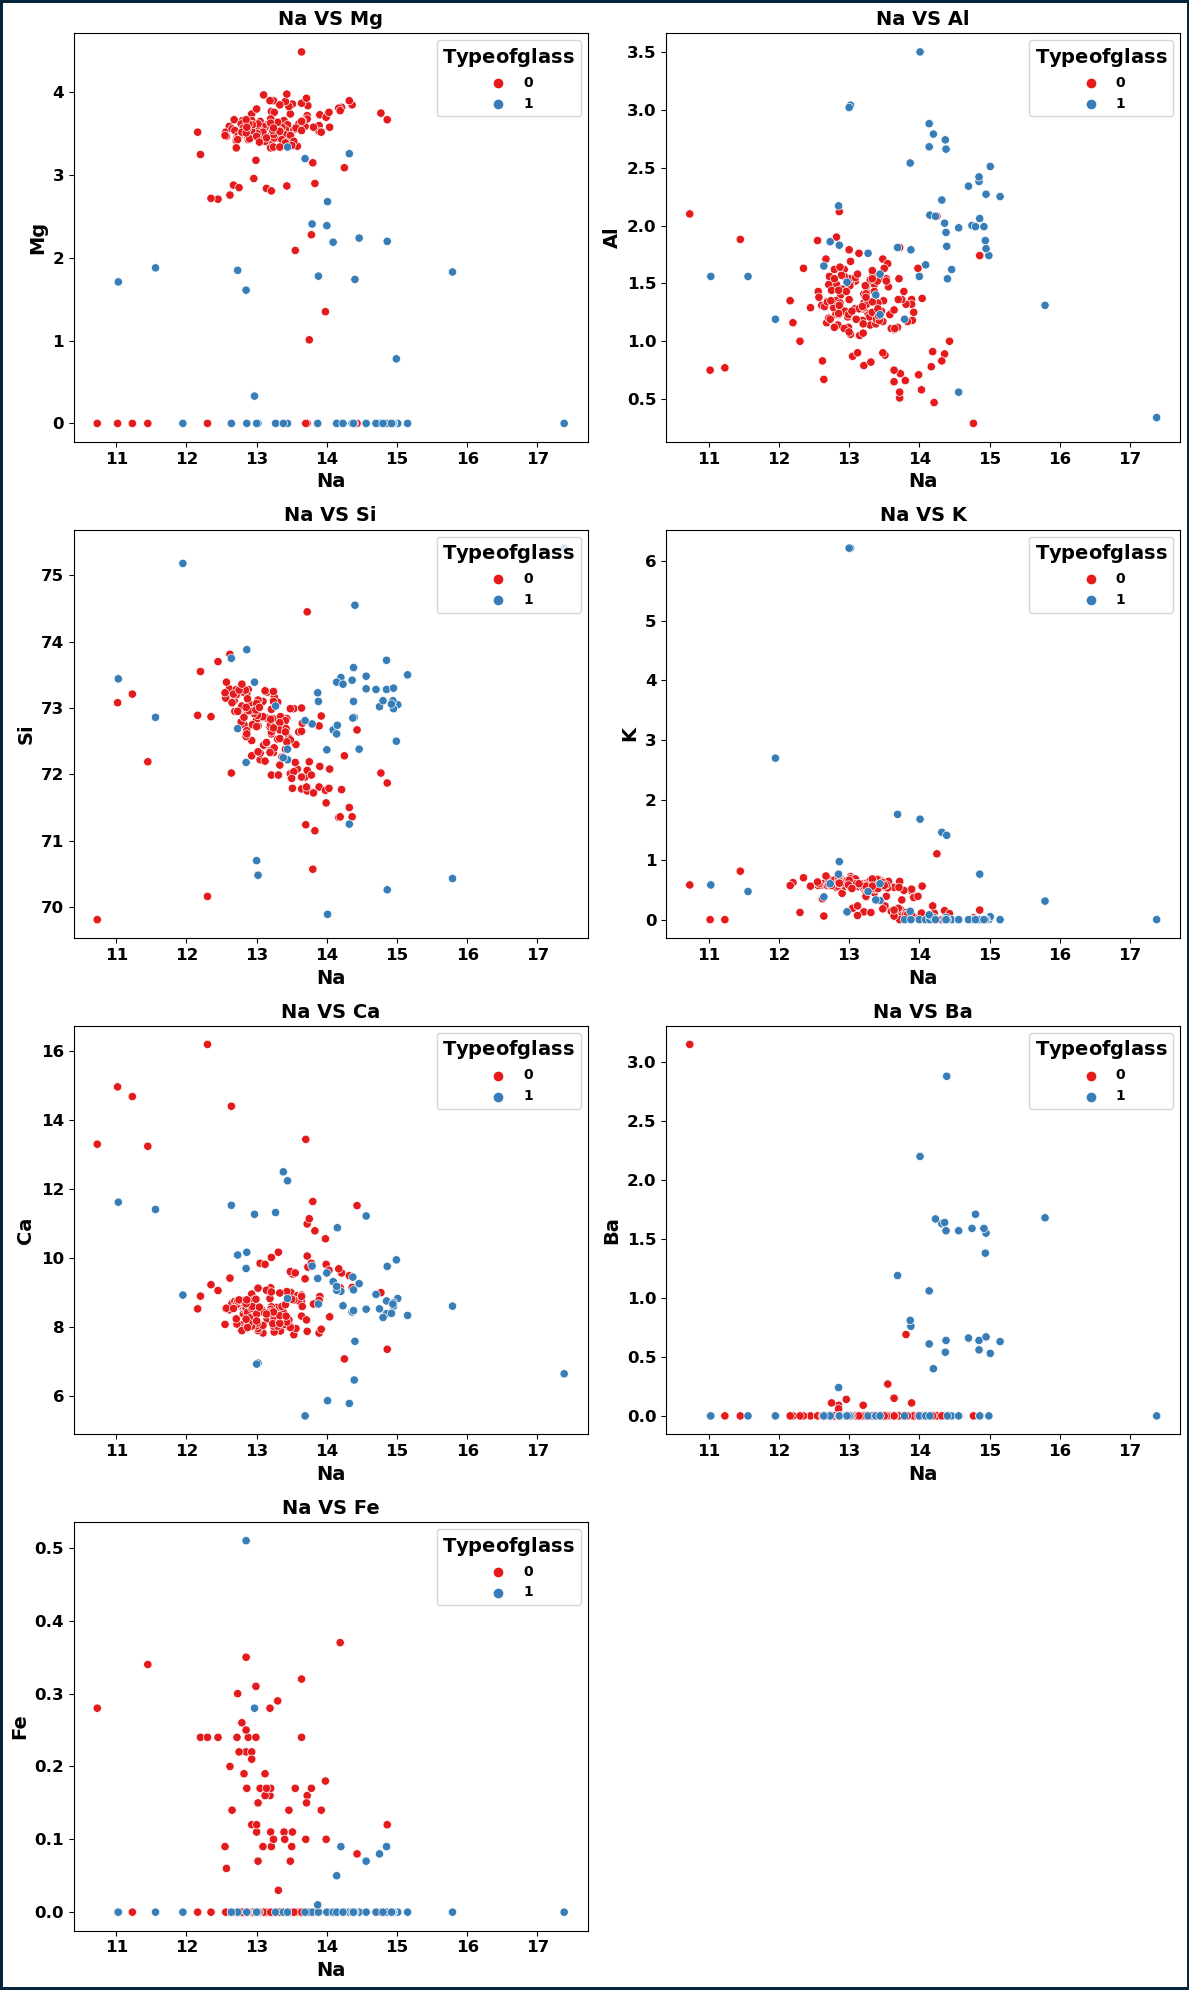

In [40]:
# Checking the relationship of all features with "Sodium" for both classes of target variable
features = ['Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Na",y=col,hue="Type of glass",palette = 'Set1')
    plt.title(('Na VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Na', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Sodium Observations:
- **Both "Sodium" and "Magnesium" contents are high in window type of glasses**
- **Remainig chemical composition other than "Magnesium" is decreaing with increasing in "Sodium" content in window type of glasses**
- **"Barium" content is increasing along with "Sodium" for non-window type of glass**
- **Remainig chemical composition other than "Barium" is decreaing with increasing in "Sodium" content in non-window type of glasses**

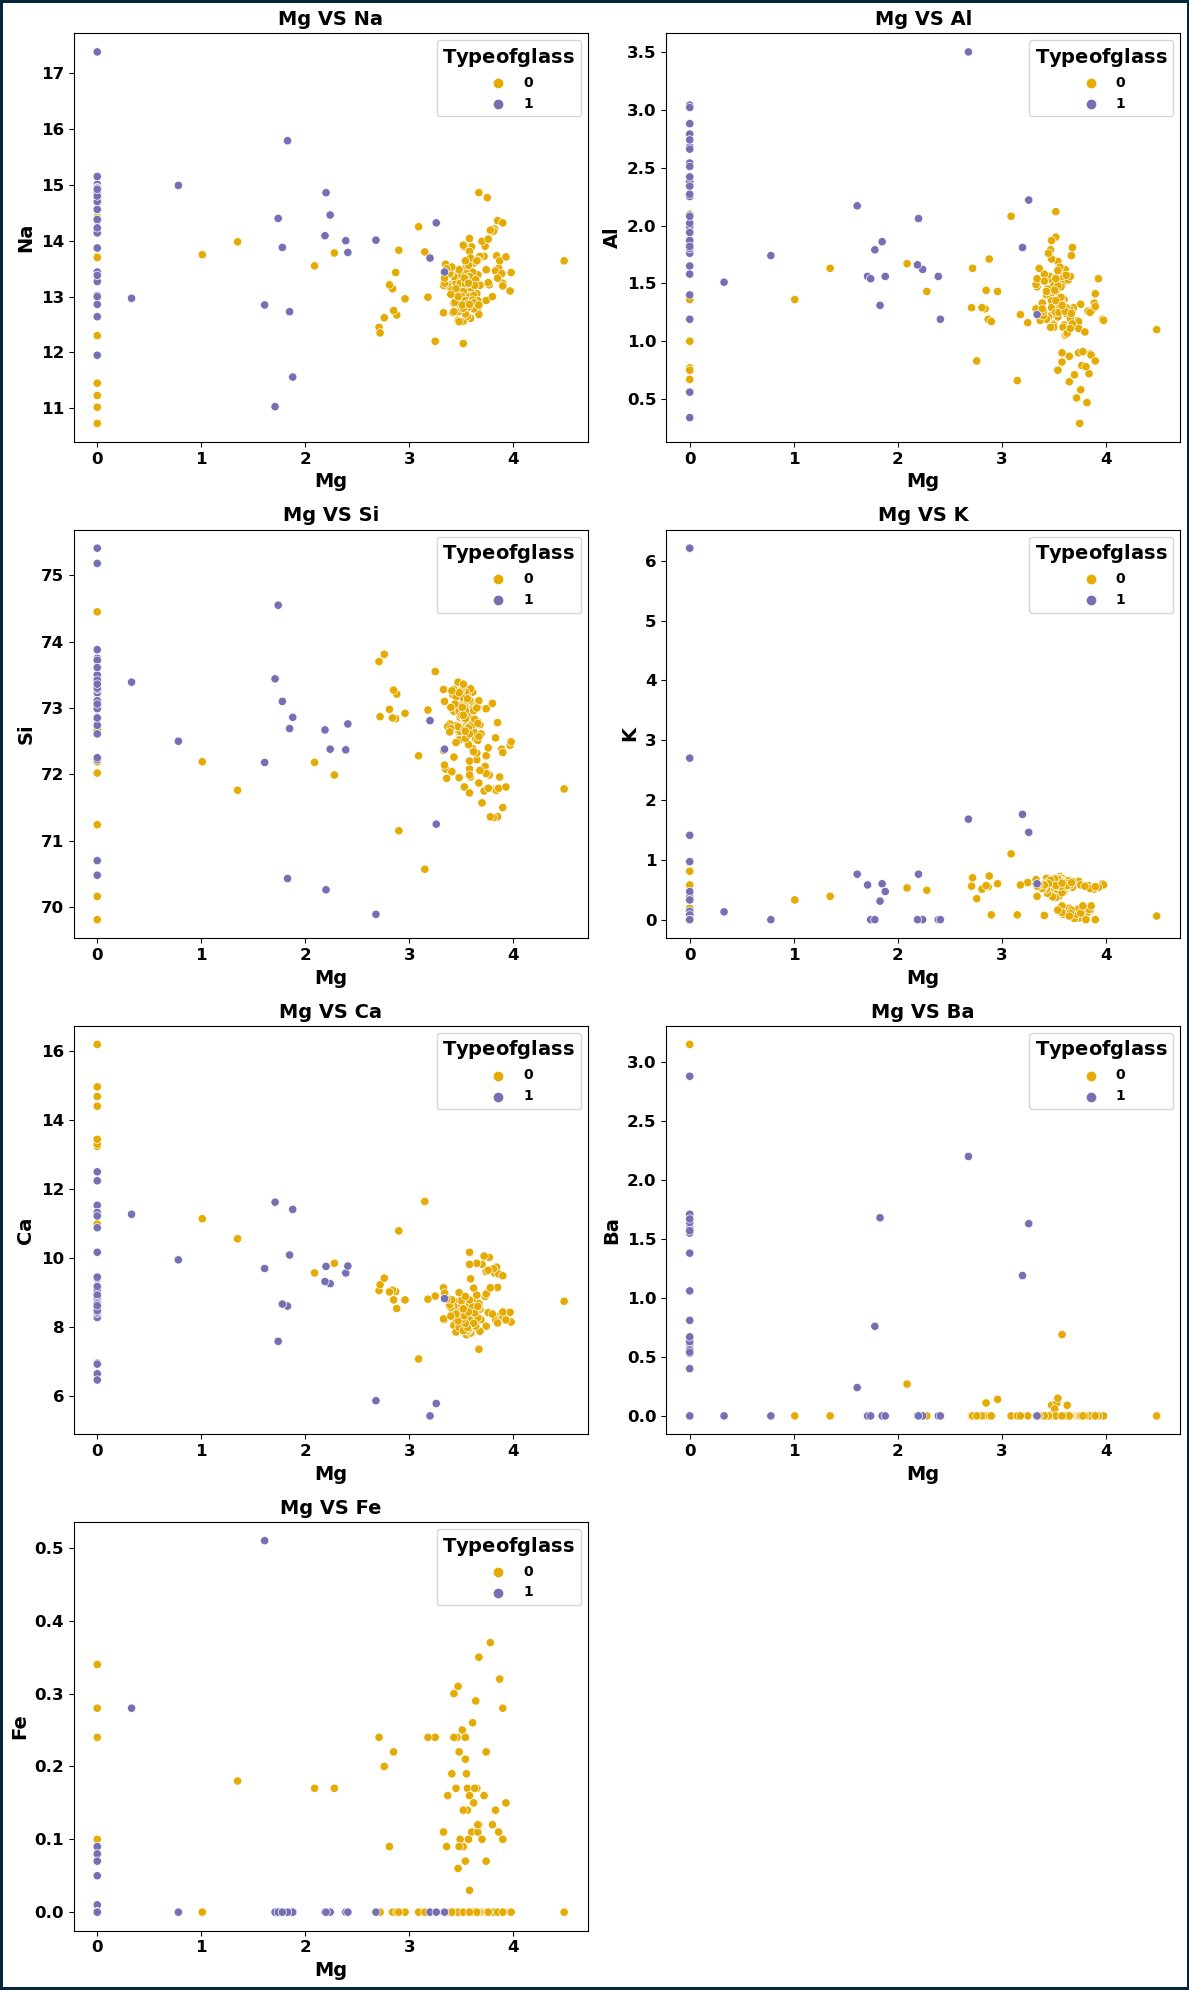

In [41]:
# Checking the relationship of all features with "Magnesium" for both classes of target variable
features = ['Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'Dark2_r')
    plt.title(('Mg VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Mg', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Magnesium Observations:
- **"Sodium" and "Silicon" contents are increasing along with "Magnesium" for window type of glass**
- **Remainig chemical compositions are decreaing with increasing in "Magnesium" content in window type of glasses**
- **Majority of  chemical compositions are decreaing with increasing in "Magnesium" content in non-window type of glasses**

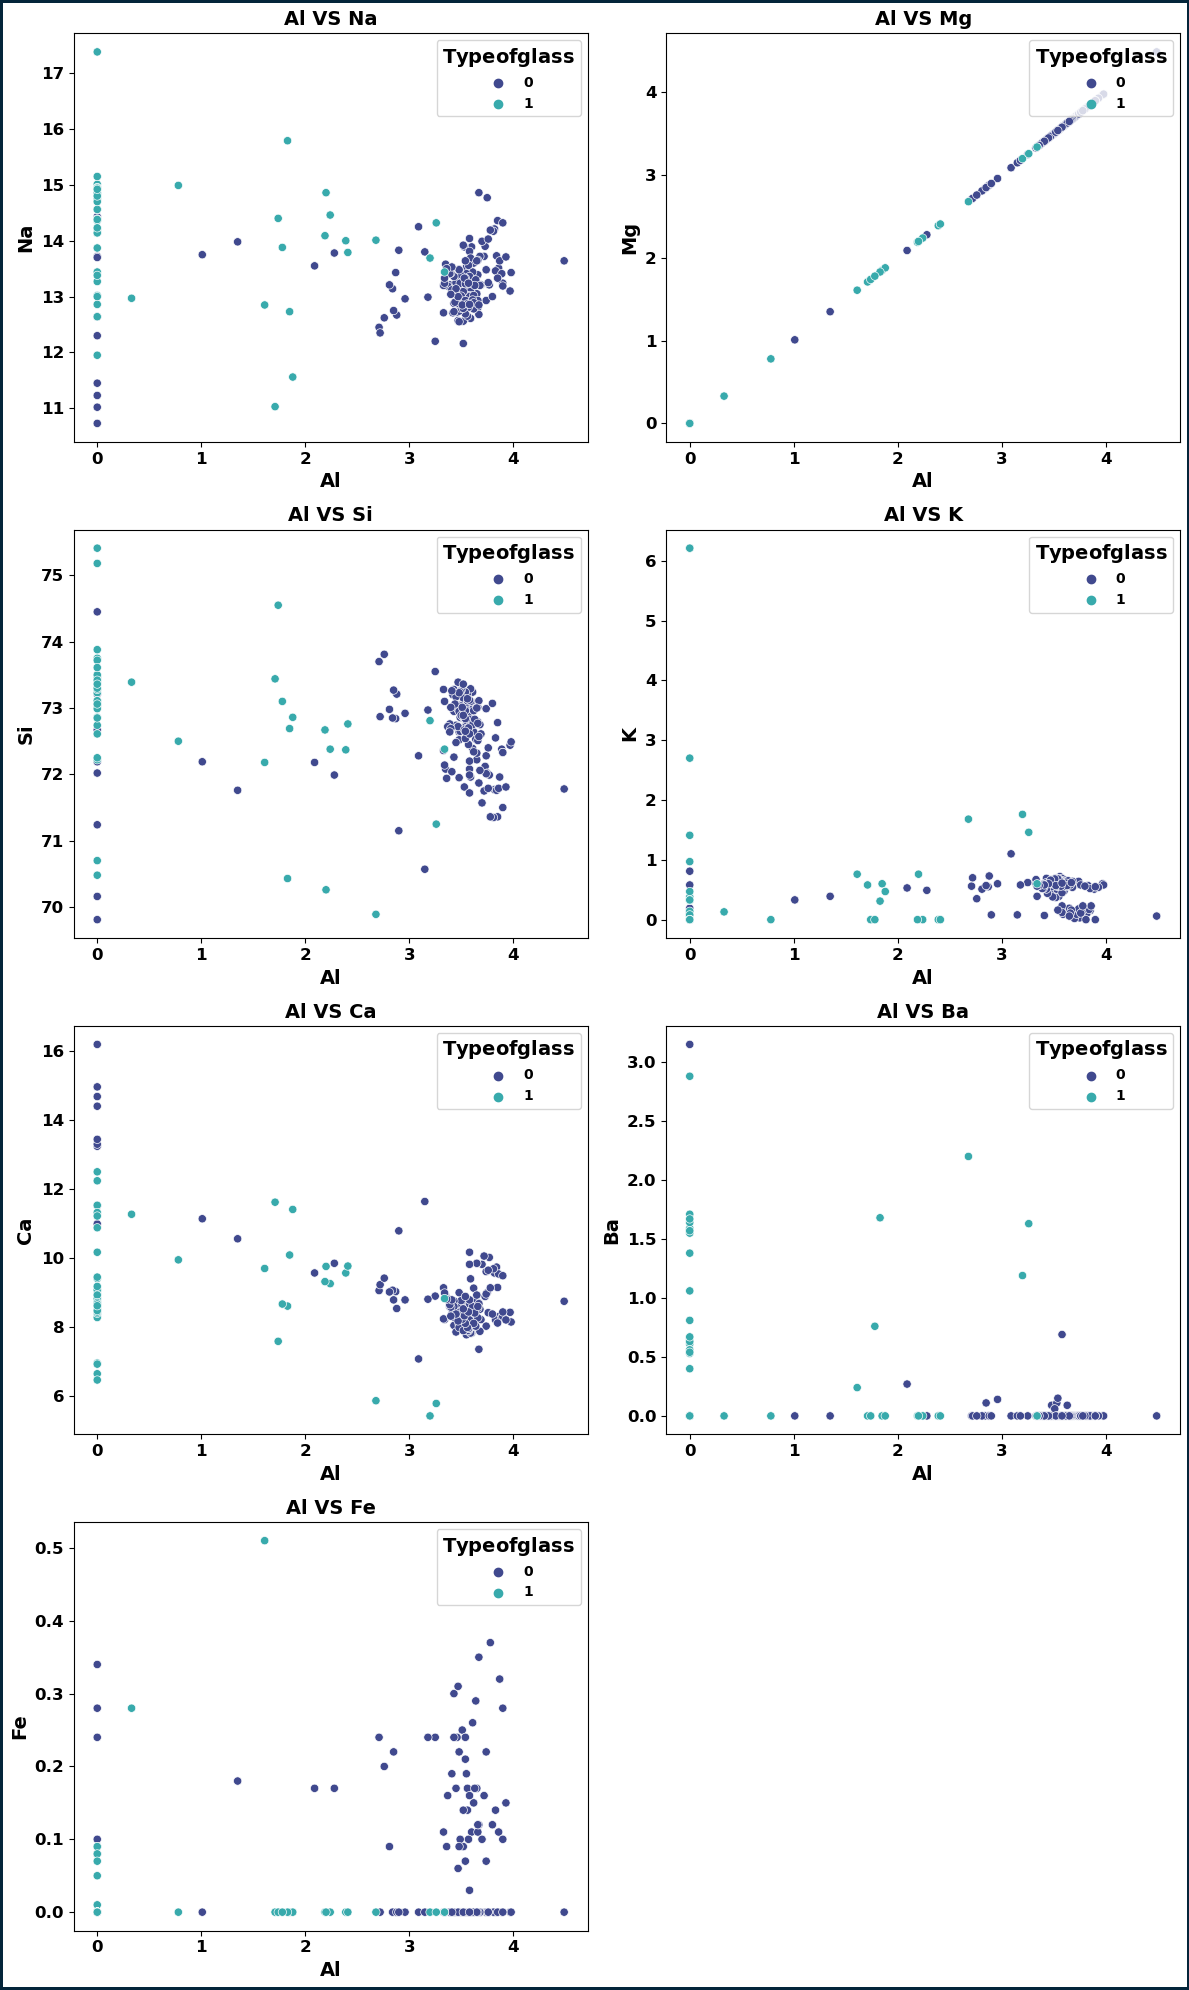

In [42]:
# Checking the relationship of all features with "Aluminium" for both classes of target variable
features = ['Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'mako')
    plt.title(('Al VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Al', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Aluminium Observations:
- **Both "Potassium" and "Silicon" contents are increasing along with "Aluminium" in window type of glasses**
- **Remainig chemical compositions are decreaing with increasing in "Aluminium" content in window type of glasses**
- **"Barium" and "Potassium" contents are increasing along with "Aluminium" for non-window type of glass**
- **Majority of remainig chemical composition are decreaing with increasing in "Aluminium" content in non-window type of glasses**


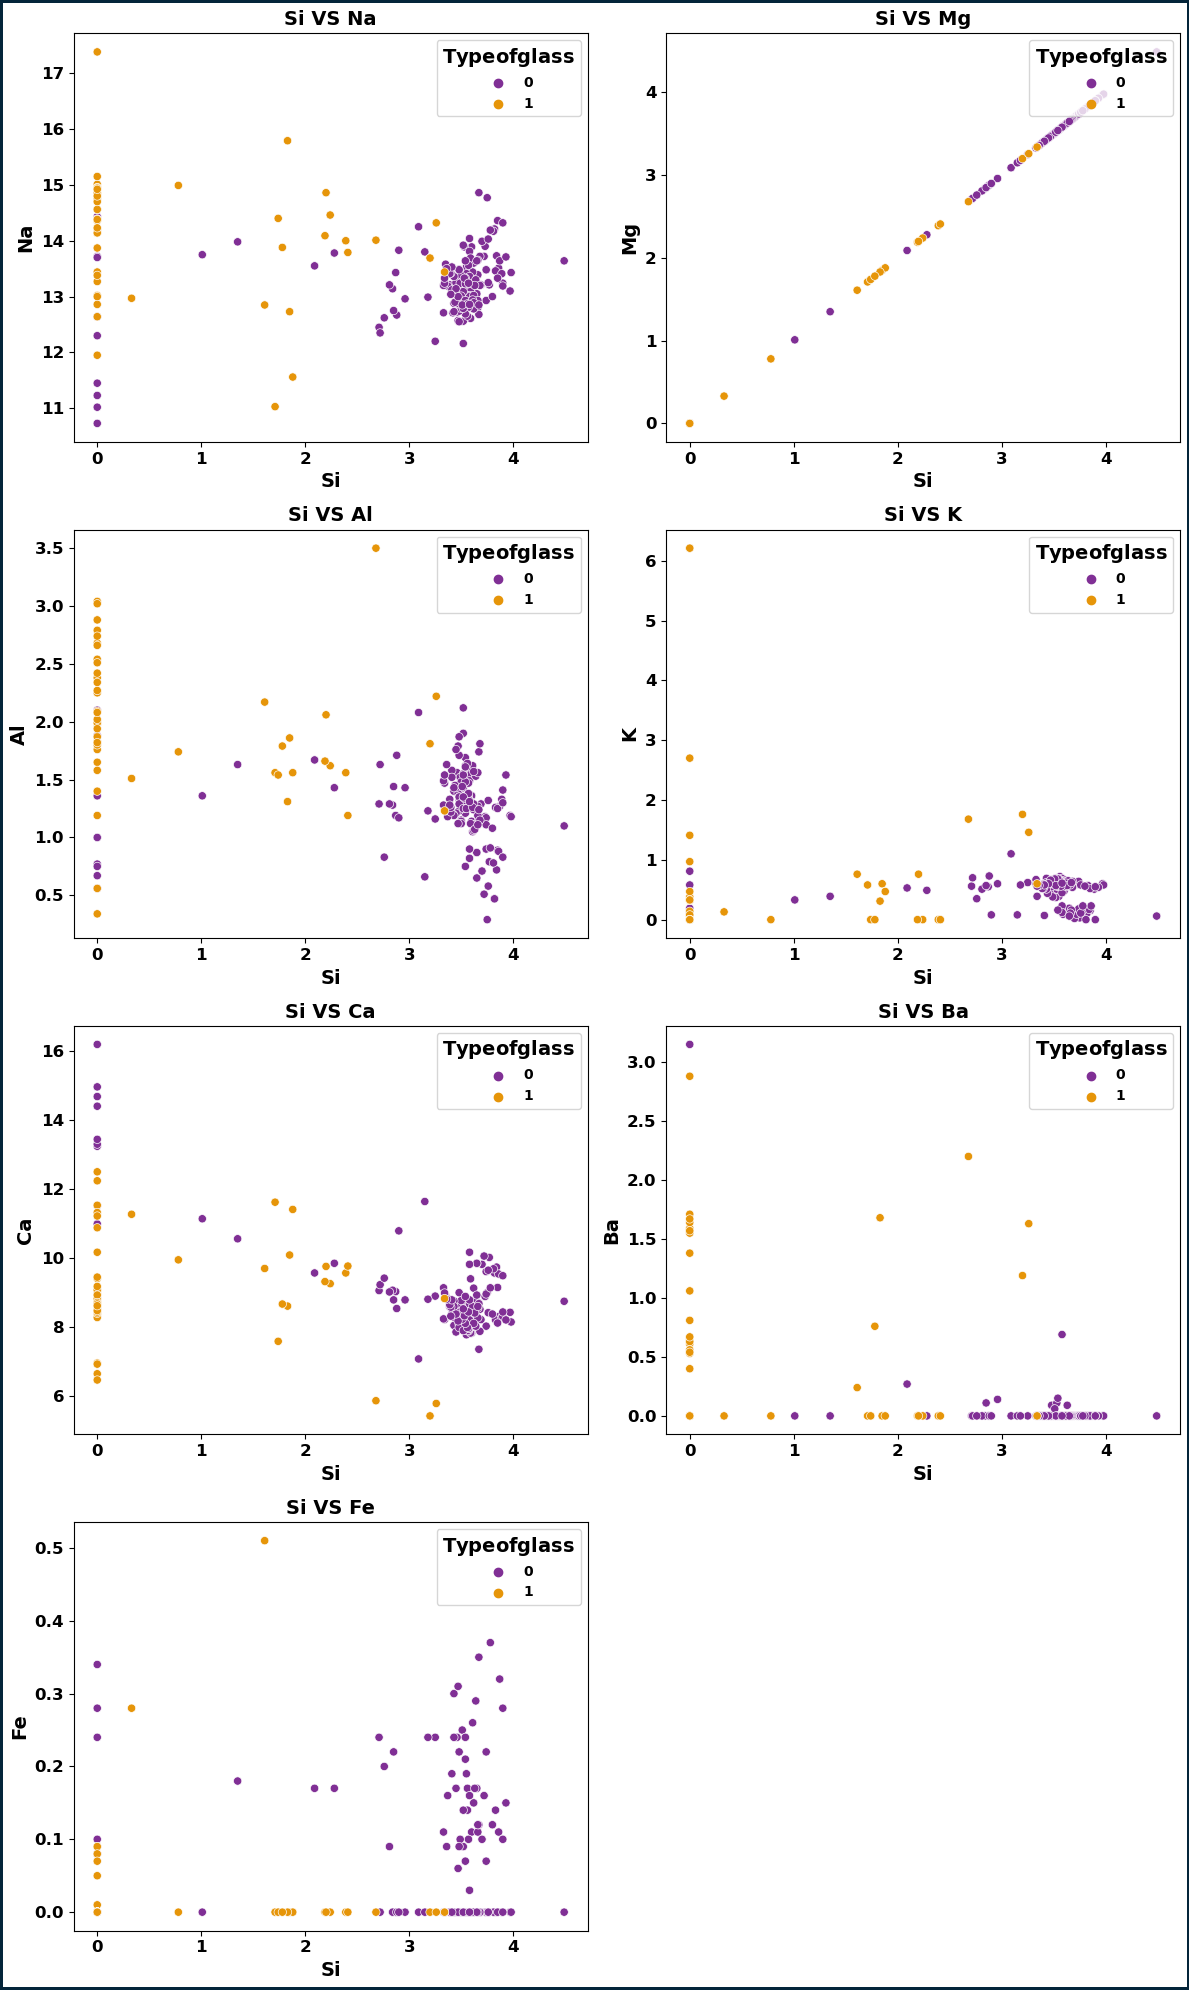

In [43]:
# Checking the relationship of all features with "Silicon" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'CMRmap')
    plt.title(('Si VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Si', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Silicon Observations:
- **Both "Potassium", "Aluminium" and "Magnesium" contents are increasing along with "Silicon" in window type of glasses**
- **Remainig chemical compositions are decreaing with increasing in "Silicon" content in window type of glasses**
- **"Calcium" and "Sodium" contents are increasing along with "Silicon" for non-window type of glass**
- **Majority of remainig chemical composition are decreaing with increasing in "Silicon" content in non-window type of glasses**

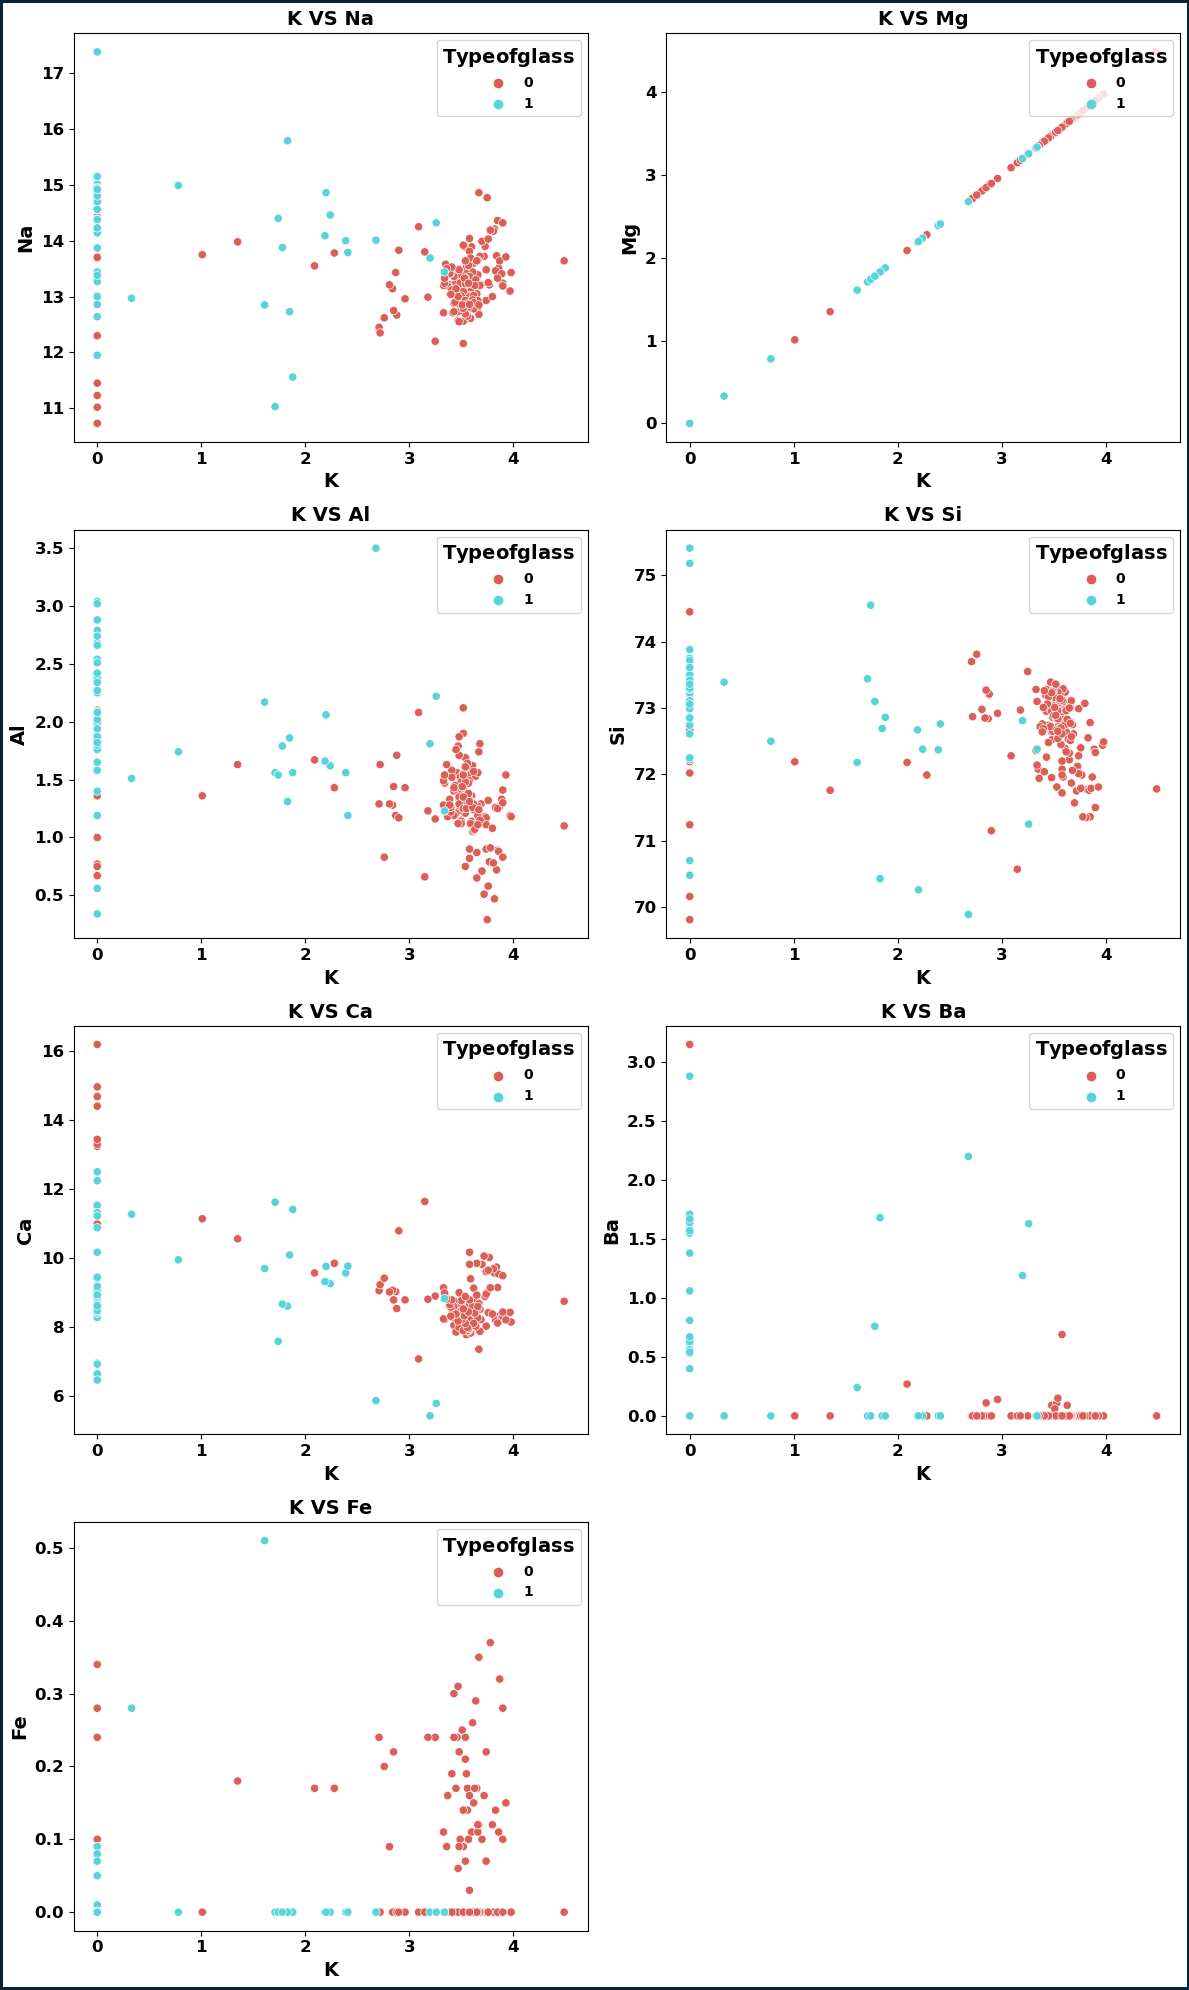

In [44]:
# Checking the relationship of all features with "Potassium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'Ca', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'hls')
    plt.title(('K VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('K', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Potassium Observations:
- **Both "Silicon" and "Aluminium" contents are increasing along with "Potassium" in window type of glasses**
- **Remainig chemical compositions are decreaing with increasing in "Potassium" content in window type of glasses**
- **"Aluminum" content is increasing along with "Potassium" for non-window type of glass**
- **Majority of remainig chemical composition are decreaing with increasing in "Potassium" content in non-window type of glasses**

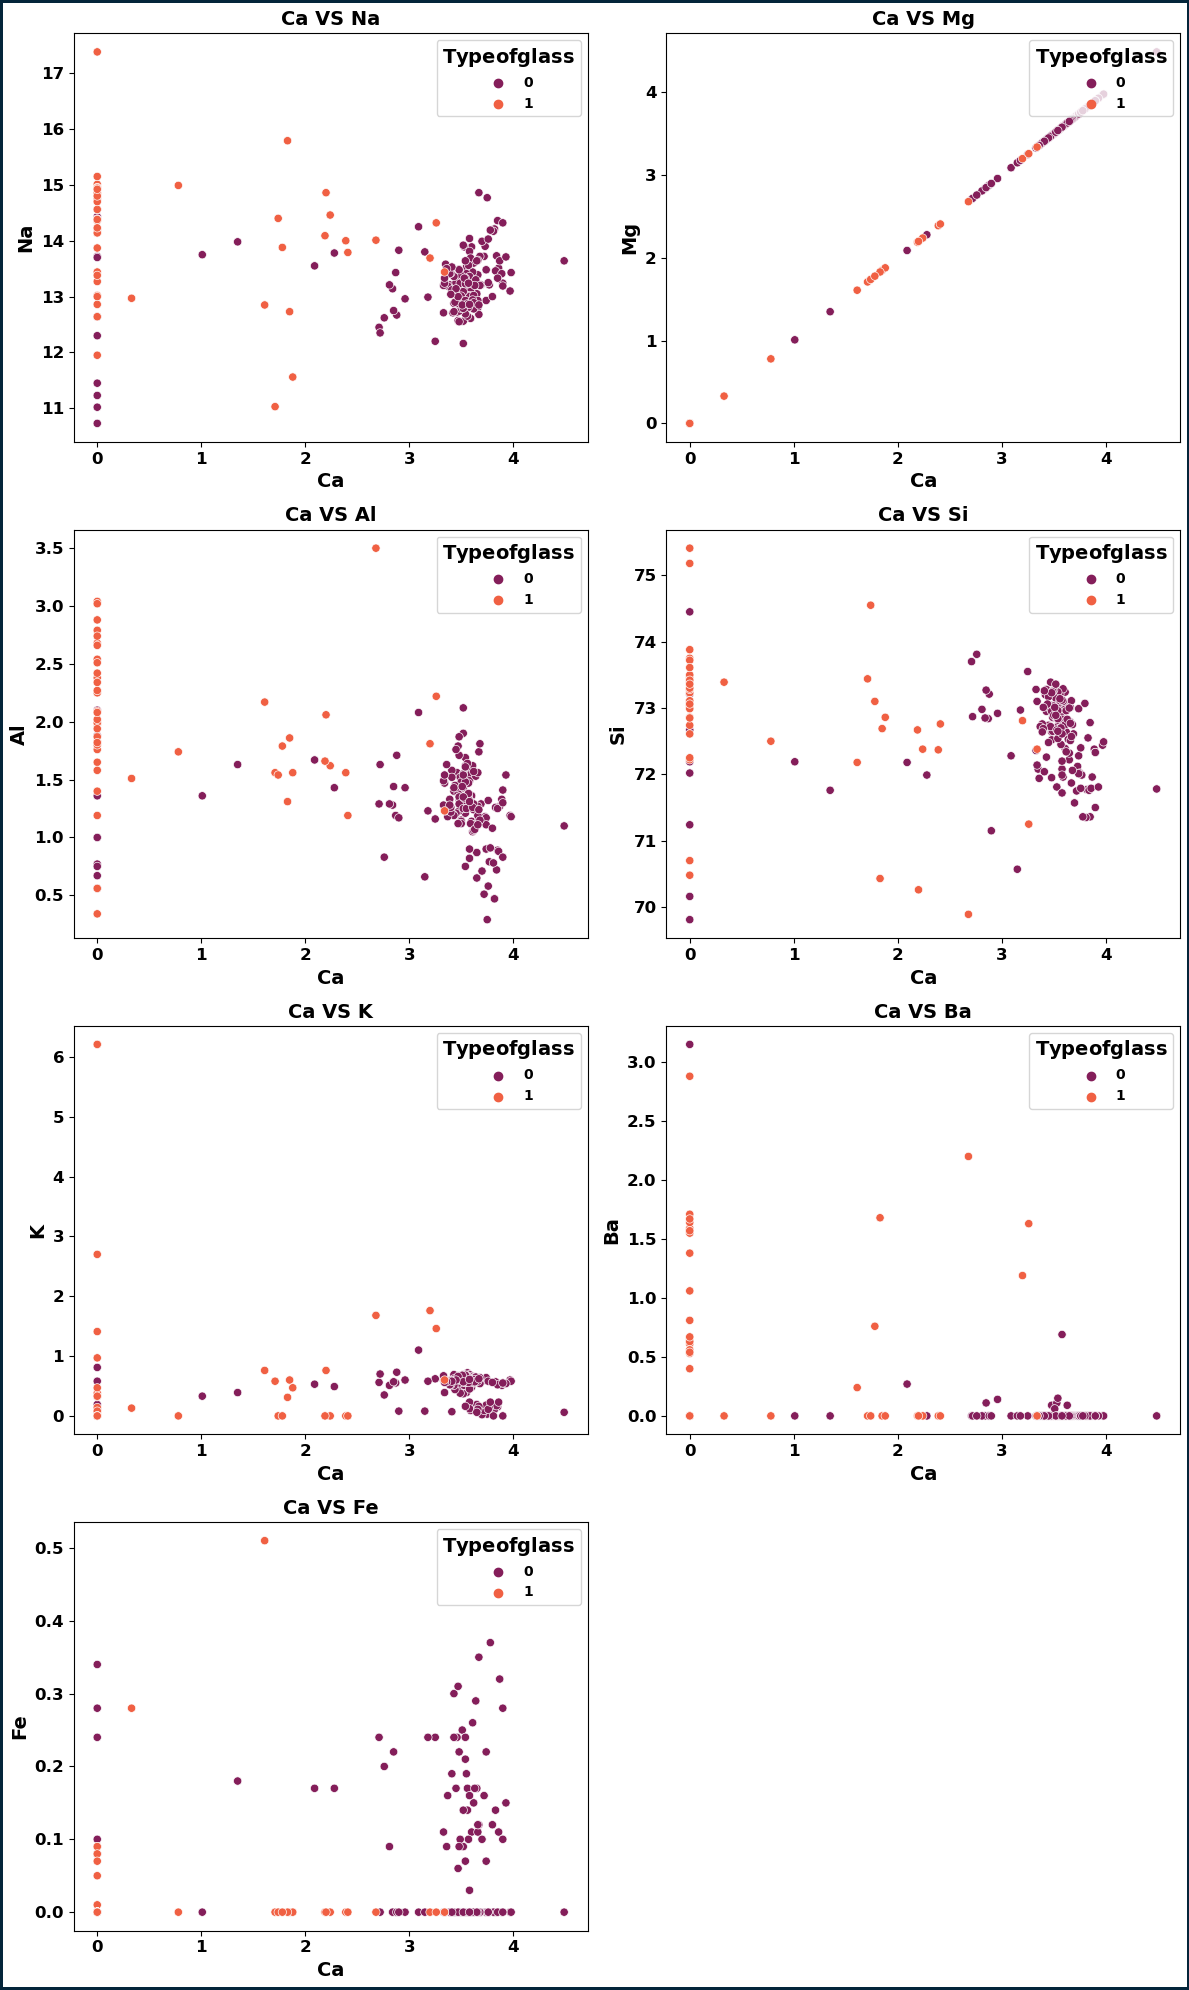

In [45]:
# Checking the relationship of all features with "Calcium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Mg",y=col,hue="Type of glass",palette = 'rocket')
    plt.title(('Ca VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Ca', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Calcium Observations:
- **"Barium" content is increasing along with "Calcium" in window type of glasses**
- **Remainig chemical compositions are decreaing with increasing in "Calcium" content in window type of glasses**
- **"Silicon" content is increasing along with "Calcium" for non-window type of glass**
- **Majority of remainig chemical composition are decreaing with increasing in "Calcium" content in non-window type of glasses**

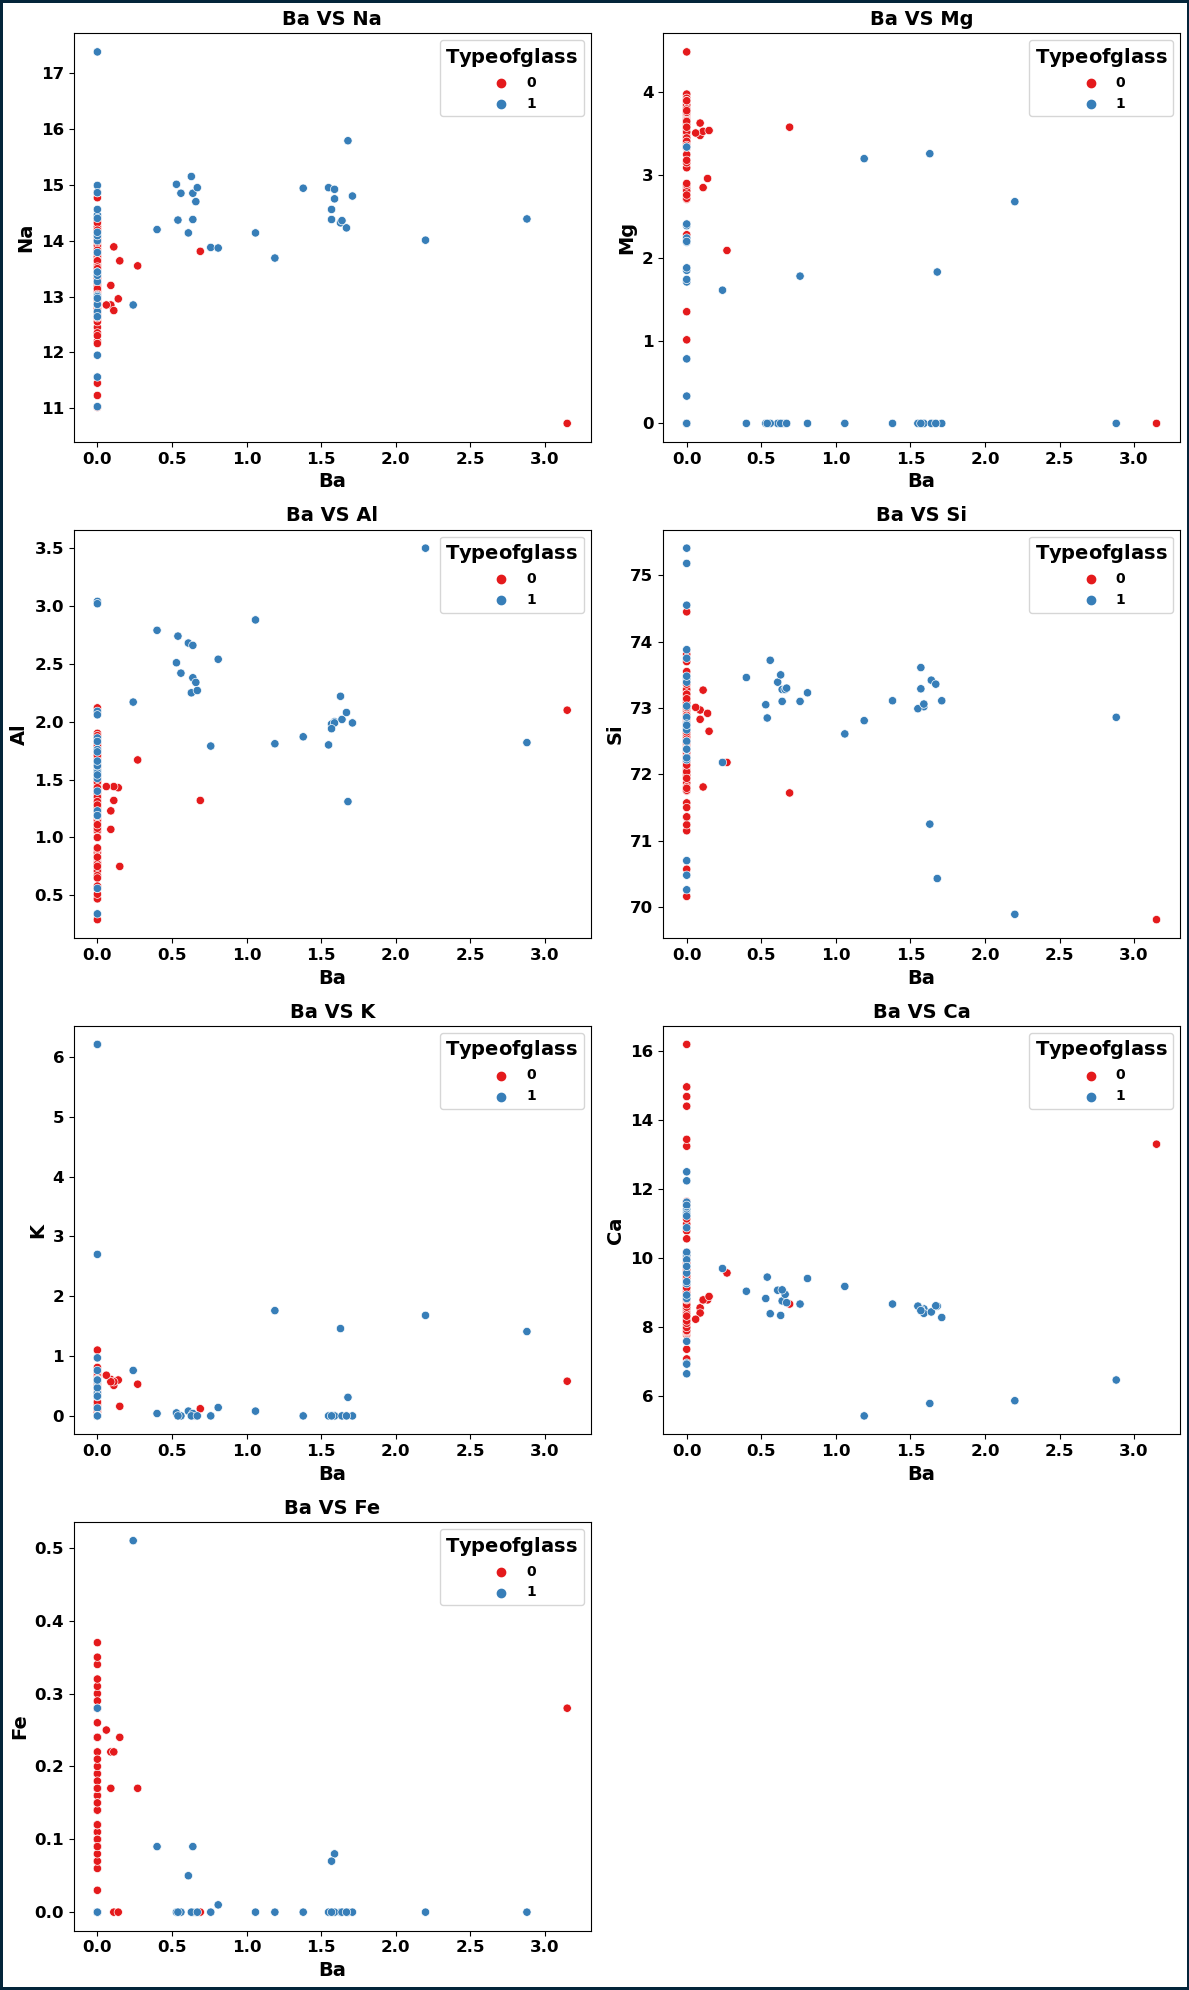

In [46]:
# Checking the relationship of all features with "Barium" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Ba",y=col,hue="Type of glass",palette = 'Set1')
    plt.title(('Ba VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Ba', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Barium Observations:
- **"Calcium" and "Aluminium" contents are increasing along with "Barium" in window type of glasses**
- **Remainig chemical compositions are decreaing with increasing in "Barium" content in window type of glasses**
- **"Aluminium" and "Sodium" contents are increasing along with "Barium" for non-window type of glass**
- **Majority of remainig chemical composition are decreaing with increasing in "Barium" content in non-window type of glasses**

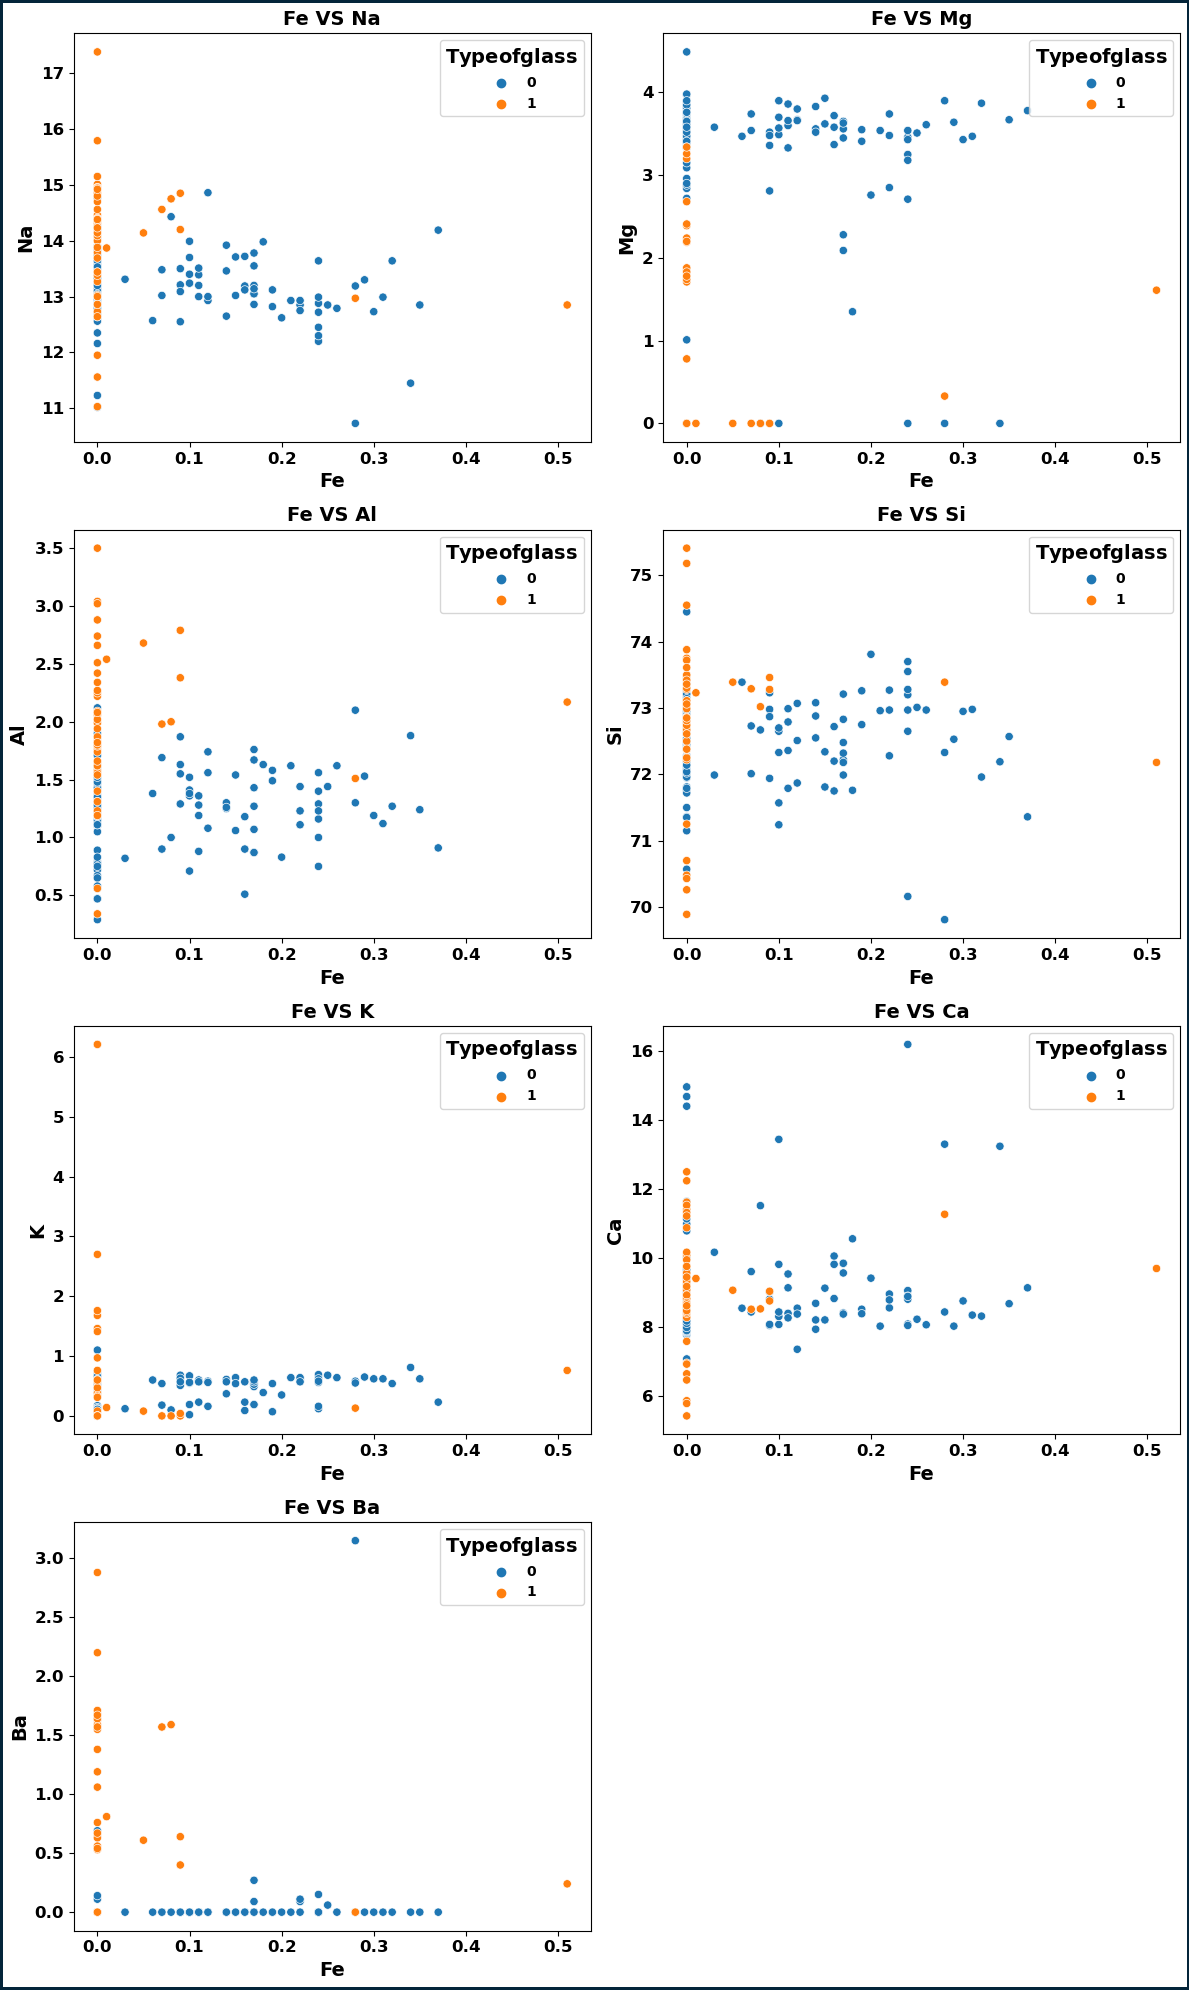

In [47]:
# Checking the relationship of all features with "Iron" for both classes of target variable
features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba']
plt.subplots(figsize=(12,20),linewidth=3, edgecolor="#04253a")
legend_properties = {'weight':'bold'}
for i ,col in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="Fe",y=col,hue="Type of glass",palette = 'tab10')
    plt.title(('Fe VS {}').format(features[i]),fontsize=14,fontweight ='bold')
    plt.xlabel('Fe', fontsize=14,fontweight='bold')
    plt.ylabel(('{}').format(features[i]), fontsize=14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight ='bold')
    plt.yticks(fontsize=12,fontweight ='bold')
    plt.legend(title=r'$\bf{Type of glass}$', fontsize='14', title_fontsize='14',loc="upper right", frameon=True,prop=dict(weight='bold'))
    plt.tight_layout()
plt.show()

#### Iron Observations:
- **Not much variation in the chemical composition of all contents with  increasing in "Iron" content in window type of glasses**
- **"Calcium" and "Aluminium" contents are increasing along with "Iron" for non-window type of glass**
- **Majority of remaining chemical composition are decreaing with increasing in "Iron" content in non-window type of glasses**

# Checking coefficients of correlation (r)

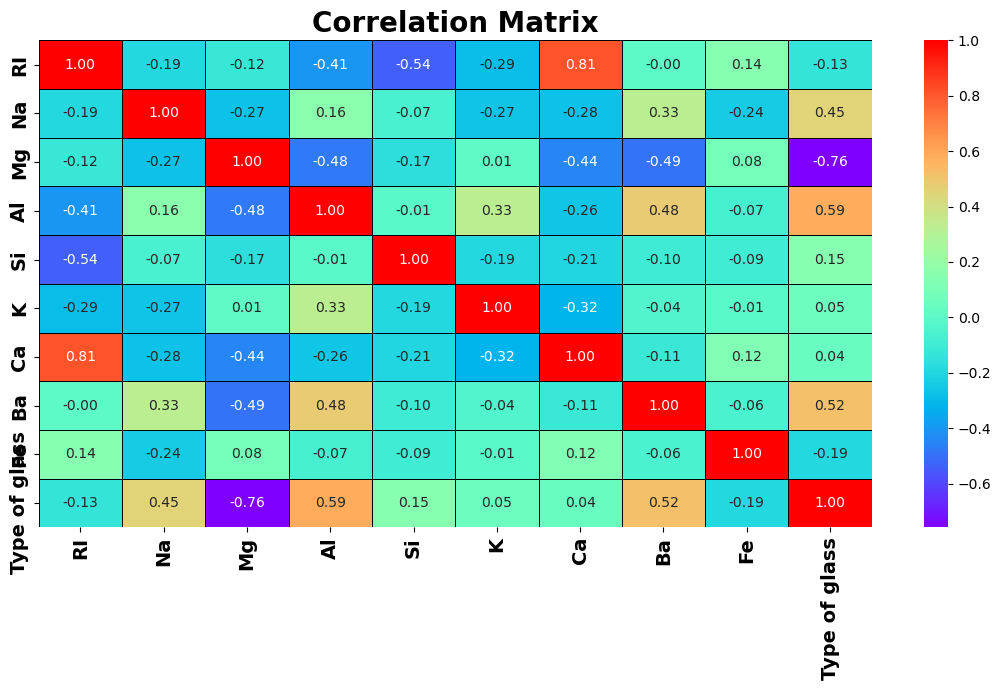

In [48]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix_1.jpg")
plt.show()

In [49]:
corr_r["Type of glass"].sort_values(ascending=False) 

Type of glass    1.000000
Al               0.585928
Ba               0.523403
Na               0.452336
Si               0.148072
K                0.053774
Ca               0.040670
RI              -0.134327
Fe              -0.194903
Mg              -0.758289
Name: Type of glass, dtype: float64

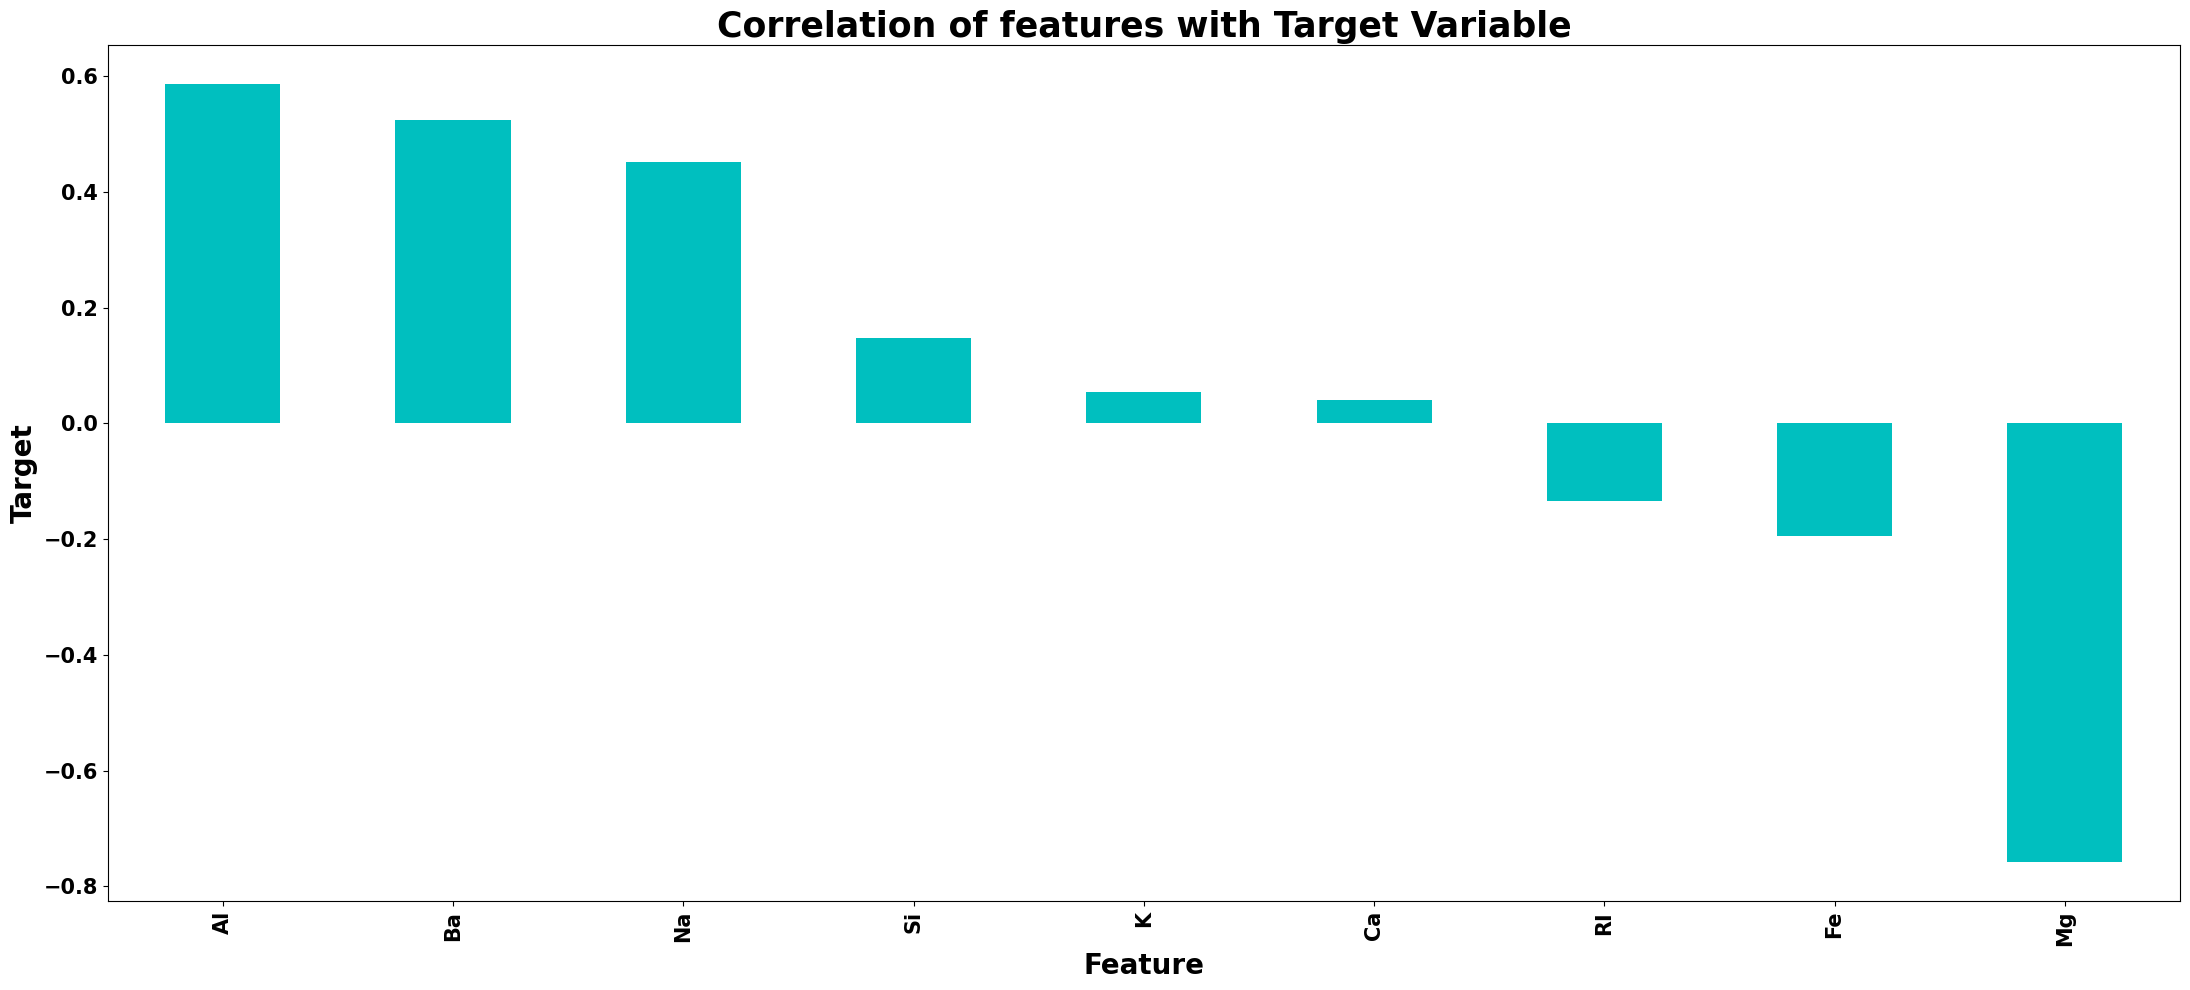

In [50]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **Mg,Al,Ba are strongly correlated with target variable**
- **K,Ca are very weakly correlated with target variable**
- **Si,Ri,Fe are weakly correlated with target variable**
- **I will check feature scores from SelectKBest algorithm with chi square test and will check if any features have lower score to take futher decisions.**

# Checking top features using SelectKBest algorithm

In [51]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs      Score
2    Mg  94.919699
7    Ba  82.412774
3    Al  12.615323
1    Na   2.167533
8    Fe   1.347517
5     K   0.527072
6    Ca   0.079667
4    Si   0.038564
0    RI   0.000023


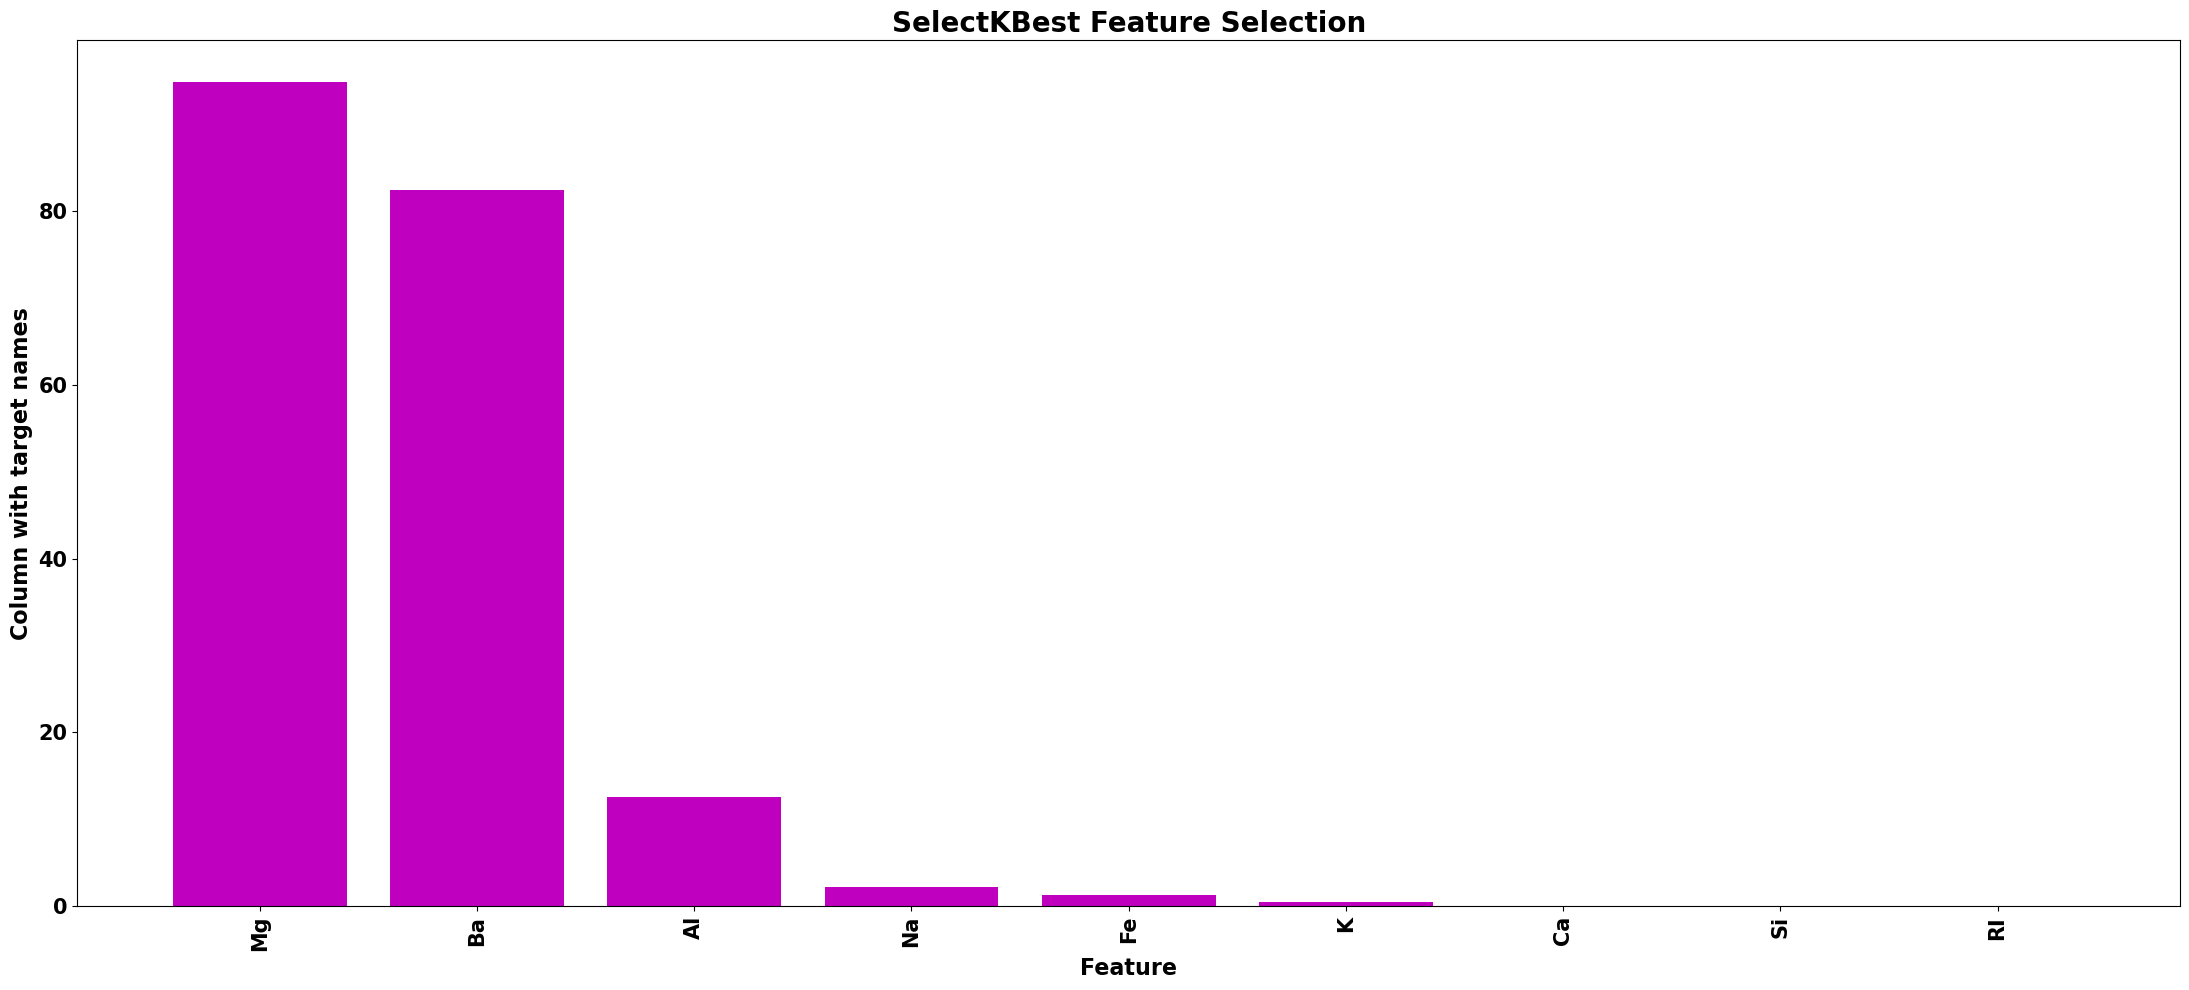

In [52]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **After comparing both the correlation(r) coefficients and SelectKBest feature scores, I can drop columns RI,Si,Ca and K as these features have both very weak correlations as well as low feature scores with SelectKBest method**

In [53]:
# Dropping columns from the dataframe
df.drop(["RI","Ca","Si","K"],axis=1,inplace=True)
x.drop(["RI","Ca","Si","K"],axis=1,inplace=True)

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [54]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,20.940465,Na
2,12.718755,Al
1,6.078129,Mg
3,1.660687,Ba
4,1.339409,Fe


#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **As there are multiple features (2) with VIF values > 10, hence dropping only one column "Na" in this case and will check again for multi collinearity after dropping this column**

In [55]:
#Dropping column "Na"
x=x.drop(["Na"],axis=1)
df=df.drop(["Na"],axis=1)

In [56]:
#Checking multicollinearity again after dropping "Na" column

In [57]:
X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,3.940348,Al
0,3.189316,Mg
2,1.650157,Ba
3,1.334488,Fe


#### Observations:
- **VIF score is reduced after dropping "Na" column and all the remaining X columns are having VIF factor < 10**
- **I will use this data for further processing of model building**

# Pre-Processing

In [58]:
x.head()

,Mg,Al,Ba,Fe
0,4.49,1.10,0.0,0.0
1,3.60,1.36,0.0,0.0
2,3.55,1.54,0.0,0.0
3,3.69,1.29,0.0,0.0
4,3.62,1.24,0.0,0.0


In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

# Checking Outliers

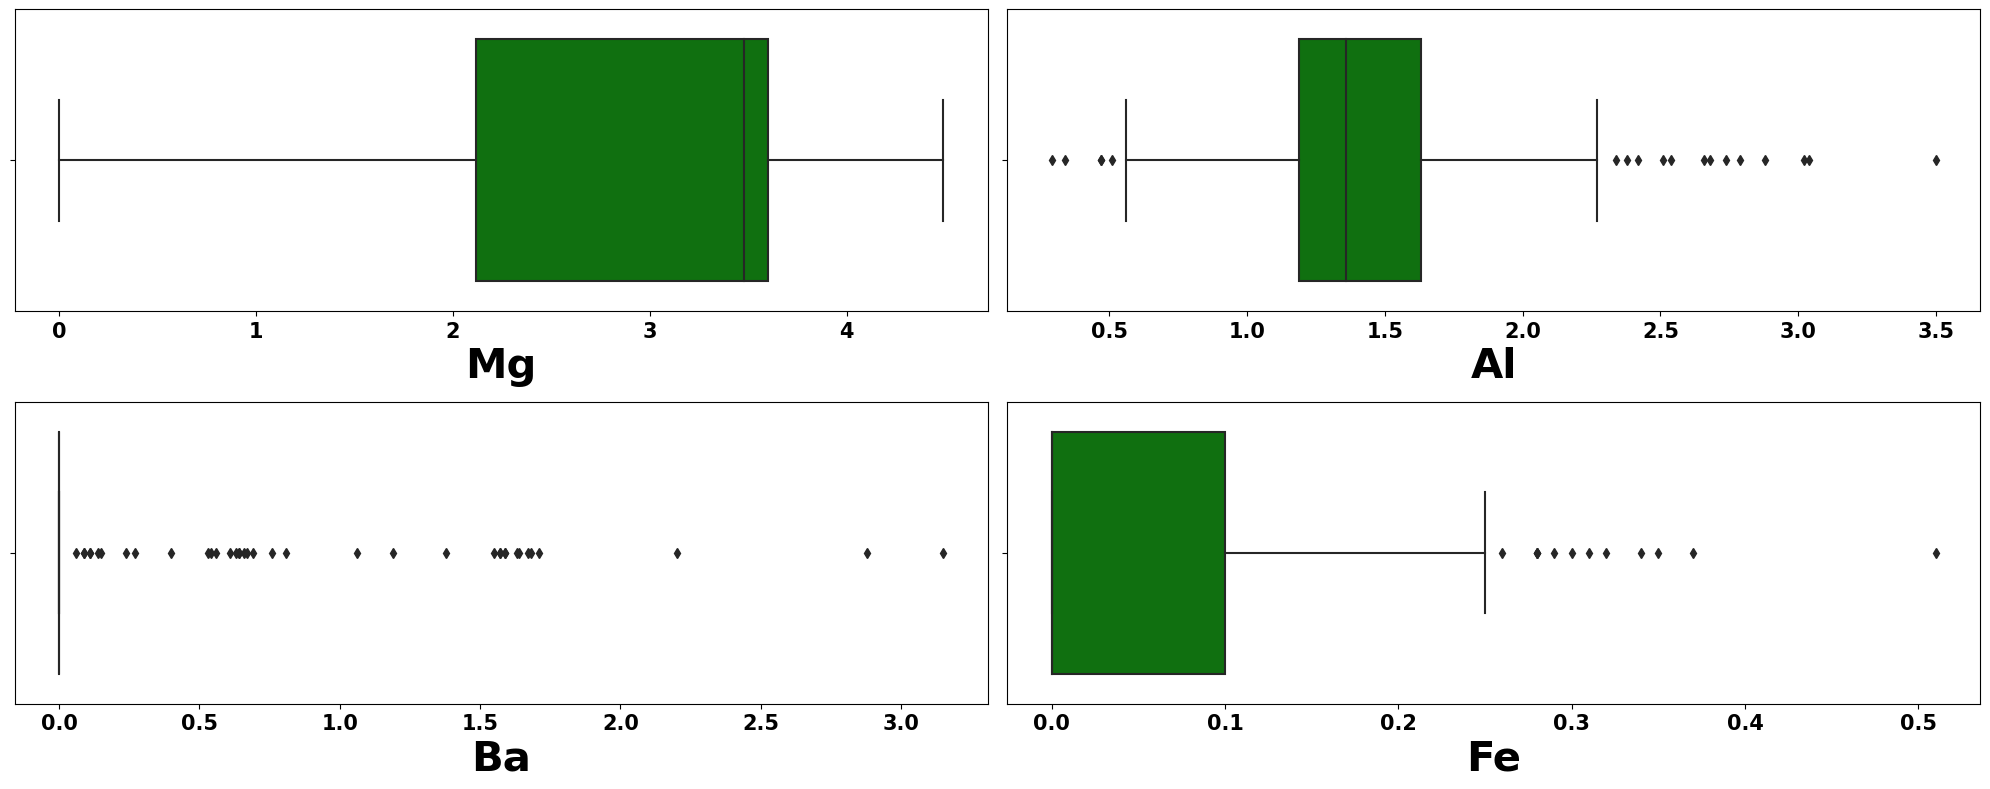

In [60]:
# Checking outliers on the continuous data
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **There are outliers present in variables 'Al','Ba' and 'Fe'**
- **No outliers present in the variable "Mg"**

# Removing Outliers using z-score method

In [61]:
x.shape

(214, 4)

In [62]:
y.shape

(214,)

In [63]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([106, 145, 162, 163, 163, 171, 172, 174, 189, 203, 207, 213],
       dtype=int64),
 array([2, 3, 3, 1, 2, 1, 1, 3, 2, 2, 2, 2], dtype=int64))

In [64]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
x1=x[(z<3).all(axis=1)]
y1=y[(z<3).all(axis=1)]

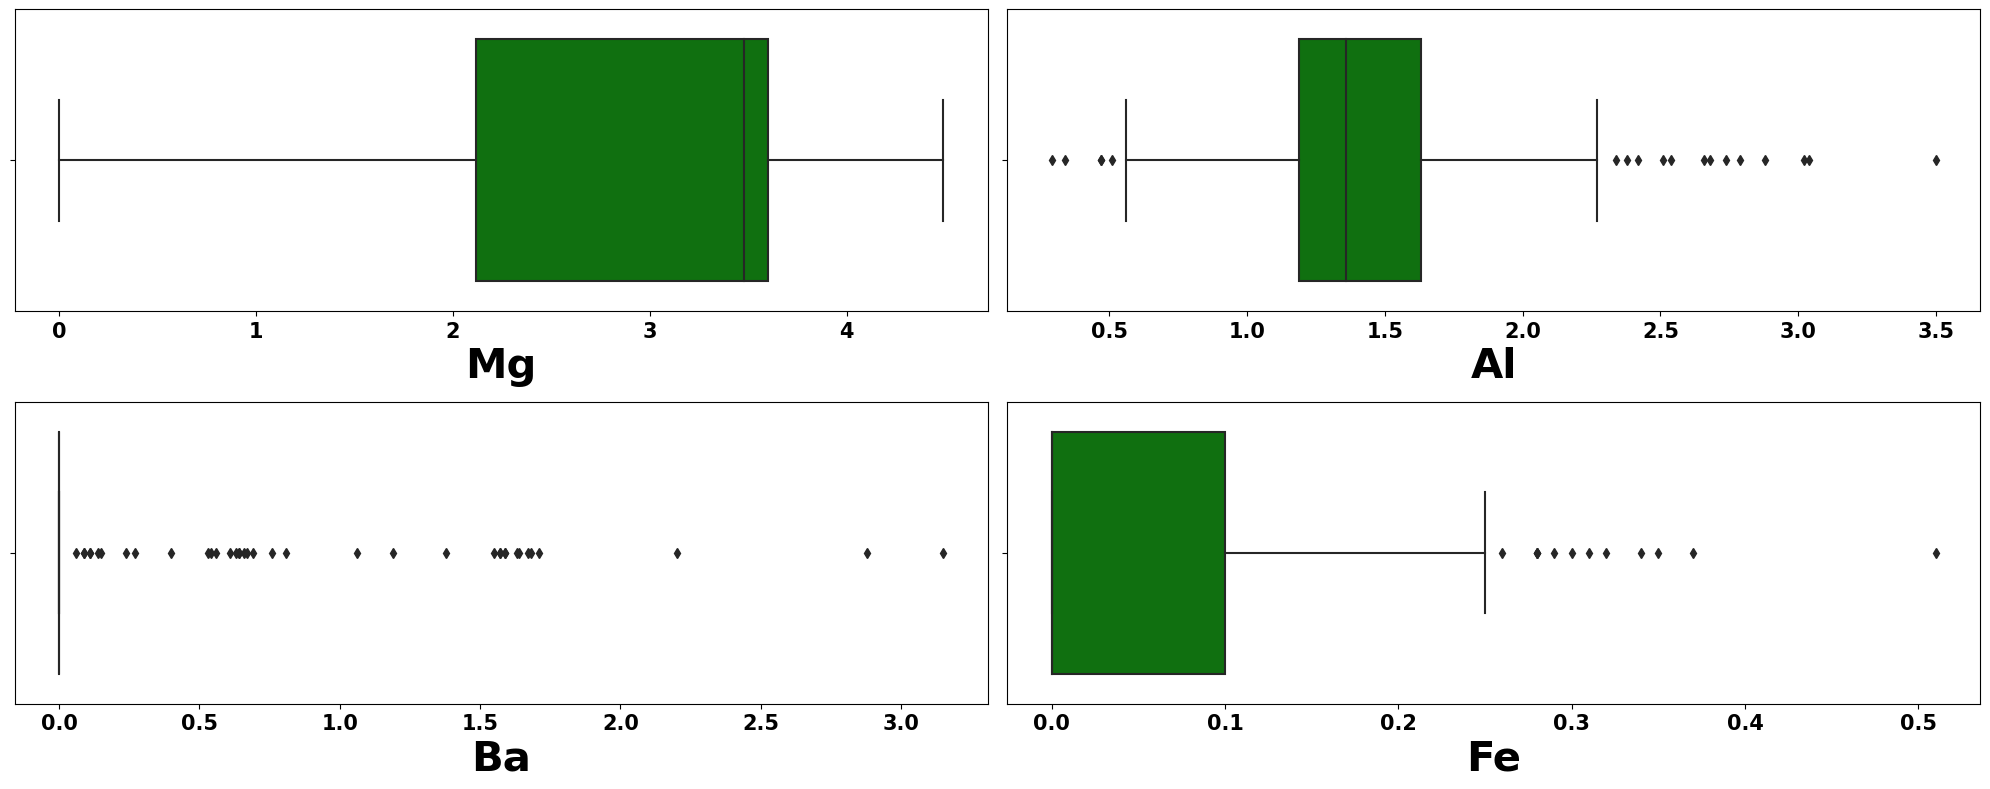

In [65]:
# Plotting features to check for outliers removal
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in x1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from 'Al','Ba' and 'Fe'**

In [66]:
x1.shape

(203, 4)

In [67]:
y1.shape

(203,)

In [68]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x1.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

5.1

#### Observations:
- **Data loss with z-score method is 5.1%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

# Removing Outliers using IQR method

In [69]:
# Calculate interquartile range (IQR) for x continuous data
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x2 = x[((x>=(Q1-1.5*IQR)) & (x<=(Q3+1.5*IQR))).all(axis=1)]
y2 = y[((x>=(Q1-1.5*IQR)) & (x<=(Q3+1.5*IQR))).all(axis=1)]

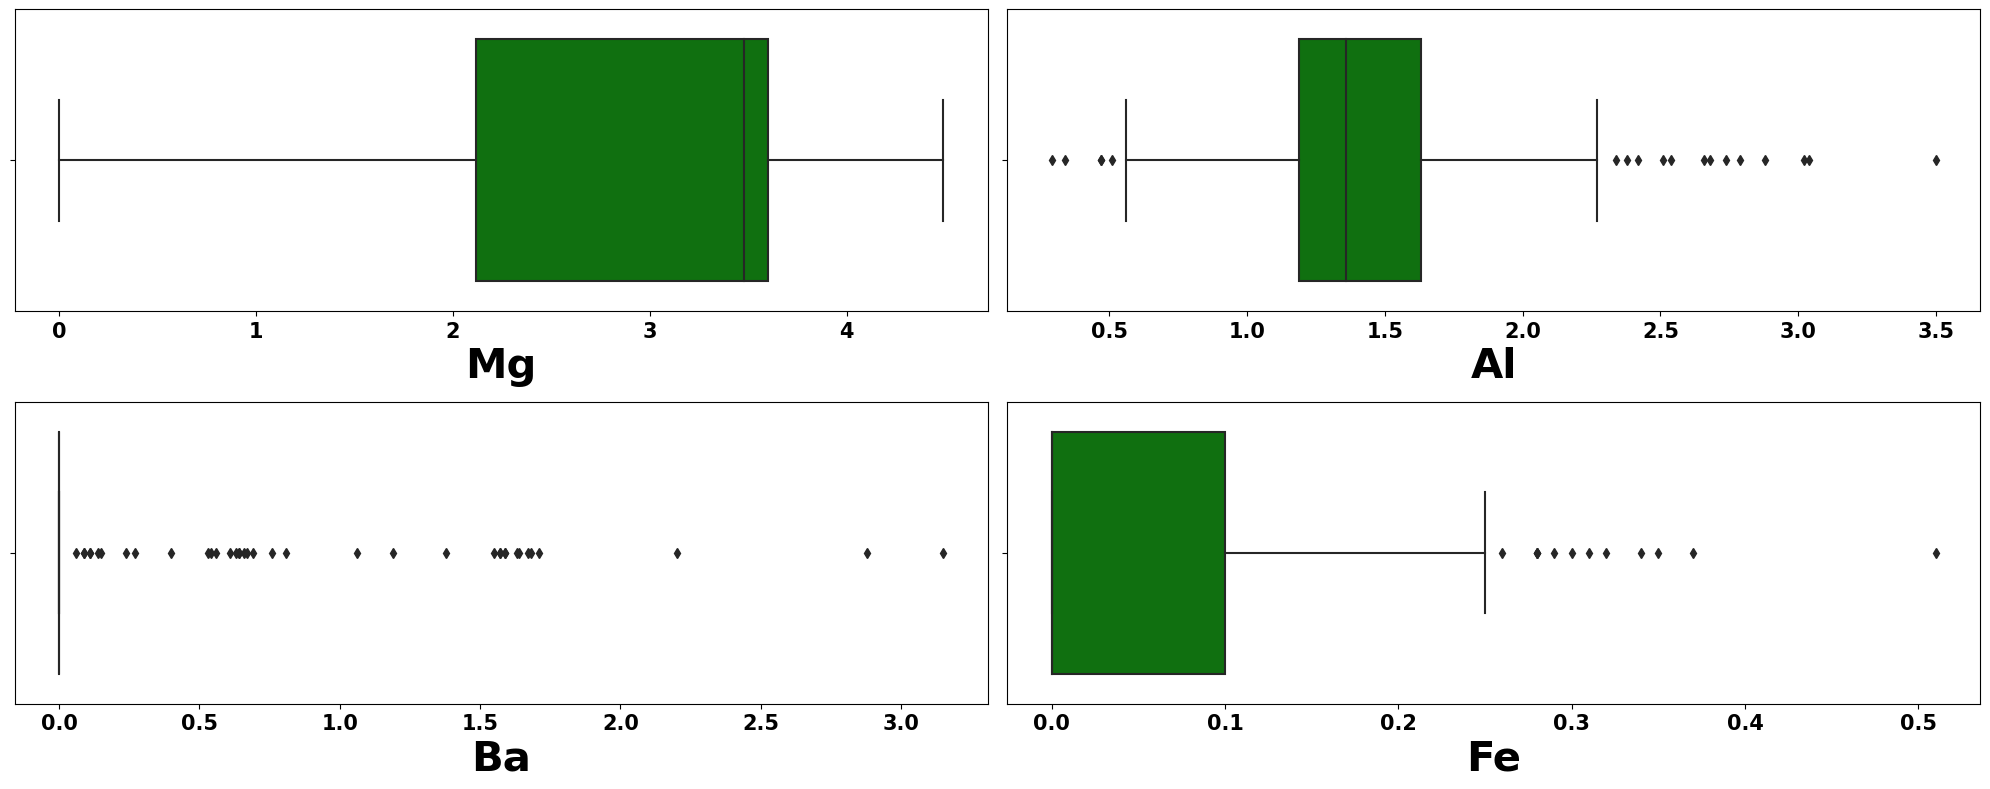

In [70]:
# Plotting features to check for outliers removal
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in x2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from 'Al','Ba' and 'Fe'**

In [71]:
x2.shape

(159, 4)

In [72]:
y2.shape

(159,)

In [73]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x2.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

25.7

#### Observations: 
- **Data loss with IQR is 25.7% which is higher than data loss with z-score (5.1%), hence considering x & y data after removing outliers using zscore method for model building**

In [74]:
x=x1
y=y1

# Skewness Check

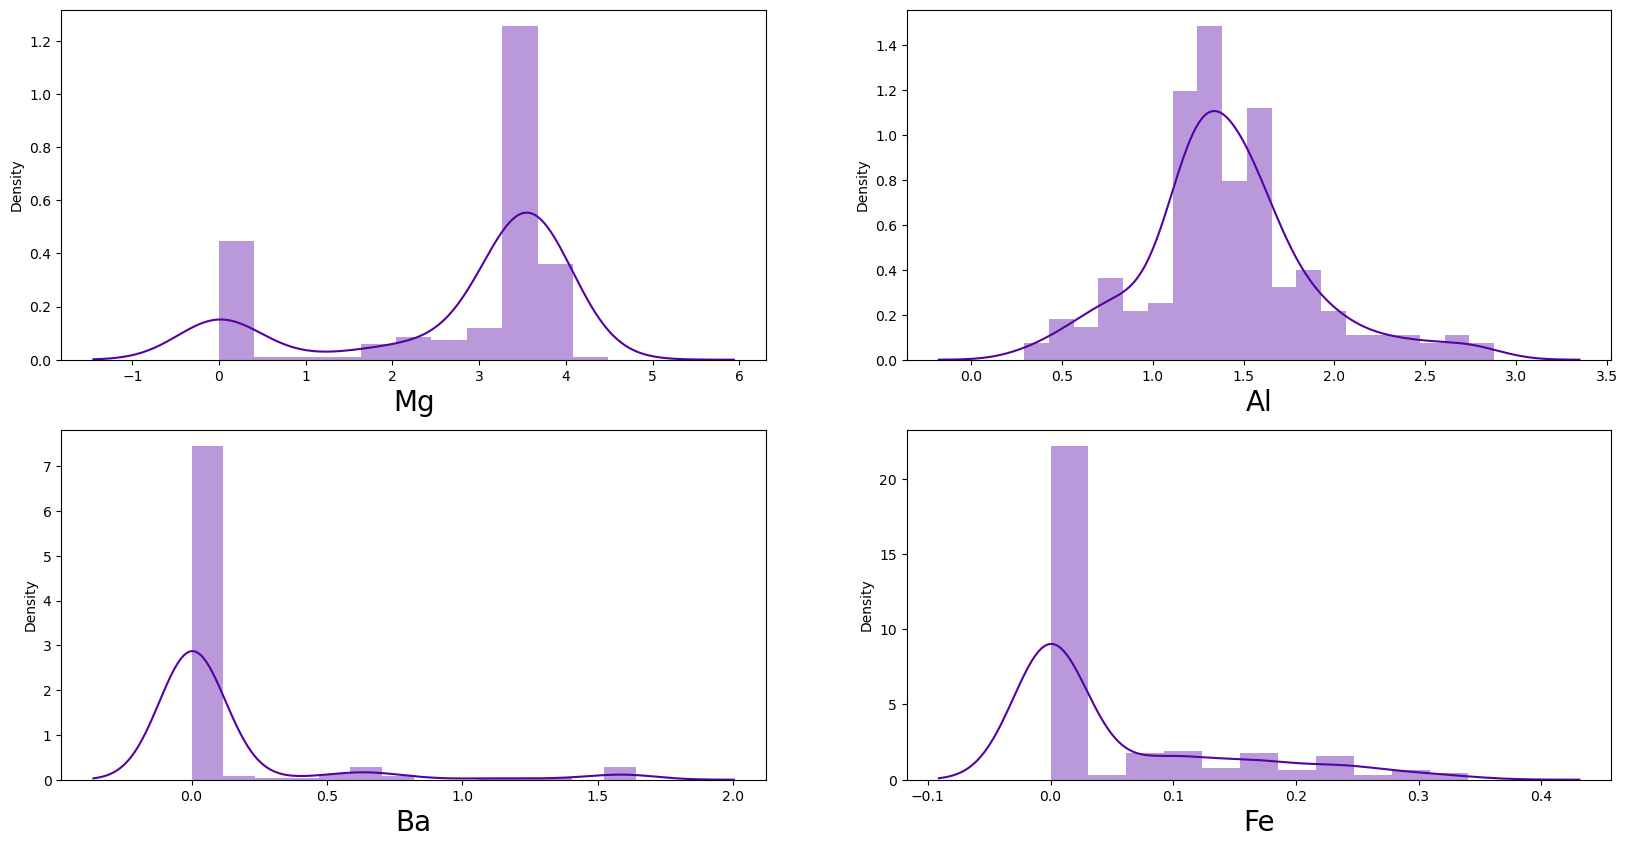

In [75]:
# Skewness of features with continuous data. We don't check skewness on categorical data and in target variable.
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in x:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to remove or reduce the skewness of all these features to get better model performance**

In [76]:
x.skew().sort_values(ascending=False) 

Ba    3.280123
Fe    1.508968
Al    0.574789
Mg   -1.295273
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are all variables beyond this range**
- **I will apply various methods to remove skewness and will consider the one with lowest skewness**

# Transforming data to remove skewness

In [77]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(x)
x_tra=pd.DataFrame(data=x_pwr,columns=x.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Ba    2.037723
Fe    0.857661
Al    0.017772
Mg   -0.960185
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method.I will check with other methods to remove skewness**
- **Skewness range: (-2.03,+2.03)**

In [78]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(x)
x_qtr=pd.DataFrame(data=x_qt,columns=x.columns)
x_qtr.skew().sort_values(ascending=False)

Ba    1.956665
Fe    0.810327
Al    0.000940
Mg   -0.152098
dtype: float64

#### Observation:
- **Skewness is reduced further with quantile transformer method compared to power tansformer**
- **Skewness range: (-1.95,+1.95)**

In [79]:
# Method3: SquareRoot transformation using numpy
import numpy as np
x_sq=pd.DataFrame()
x_sq['Al']=np.sqrt(x['Al'])
x_sq['Ba']=np.sqrt(x['Ba'])
x_sq['Fe']=np.sqrt(x['Fe'])
x_sq['Mg ']=np.sqrt(x['Mg'])
x_sq.skew().sort_values(ascending=False)

Ba     2.545742
Fe     1.012380
Al    -0.177342
Mg    -1.515275
dtype: float64

#### Observations:
- **Skewness is reduced**
- **Skewness range: (-2.54,+2.54)**
- **Overall, skewness with "Quantile Transformer" is less, hence I will consider the data from "Quantile transformer" method**

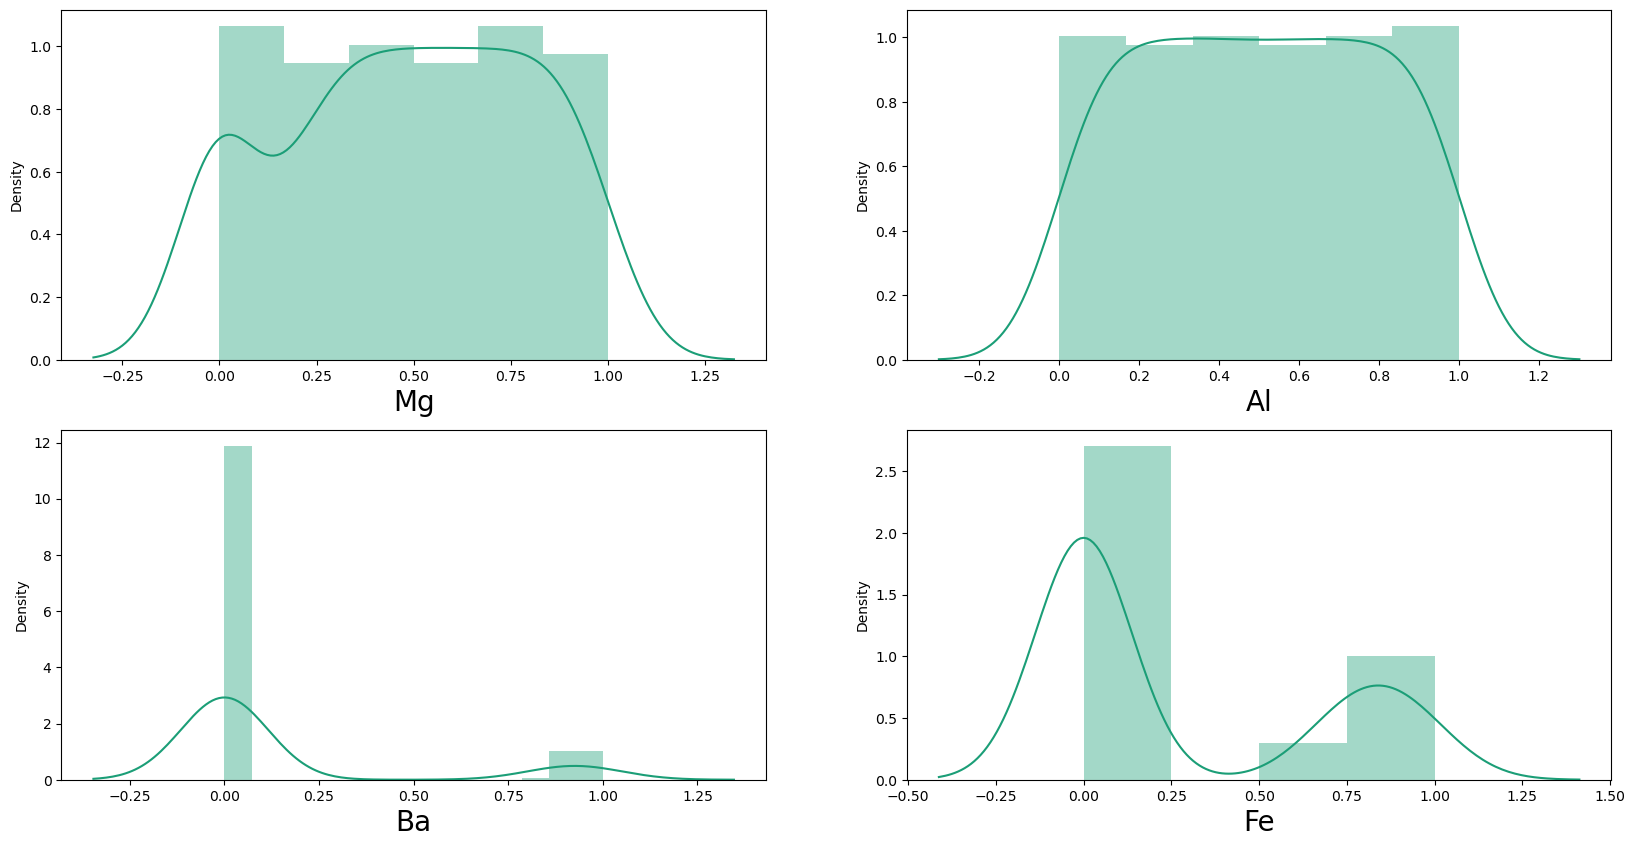

In [80]:
# Visually checking skewness after applying "Quantile Transformer method"
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x_qtr[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "quantile transformer", I am using transformed x data from "quantile transformer" for model building**   

# Scaling data

In [81]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_qtr_scaled=sc.fit_transform(x_qtr)
x=pd.DataFrame(data=x_qtr_scaled,columns=x.columns)
x.head(5)

,Mg,Al,Ba,Fe
0,1.650967,-1.159864,-0.423966,-0.687739
1,0.834233,0.026101,-0.423966,-0.687739
2,0.477408,0.623349,-0.423966,-0.687739
3,1.206917,-0.332248,-0.423966,-0.687739
4,0.953175,-0.596744,-0.423966,-0.687739


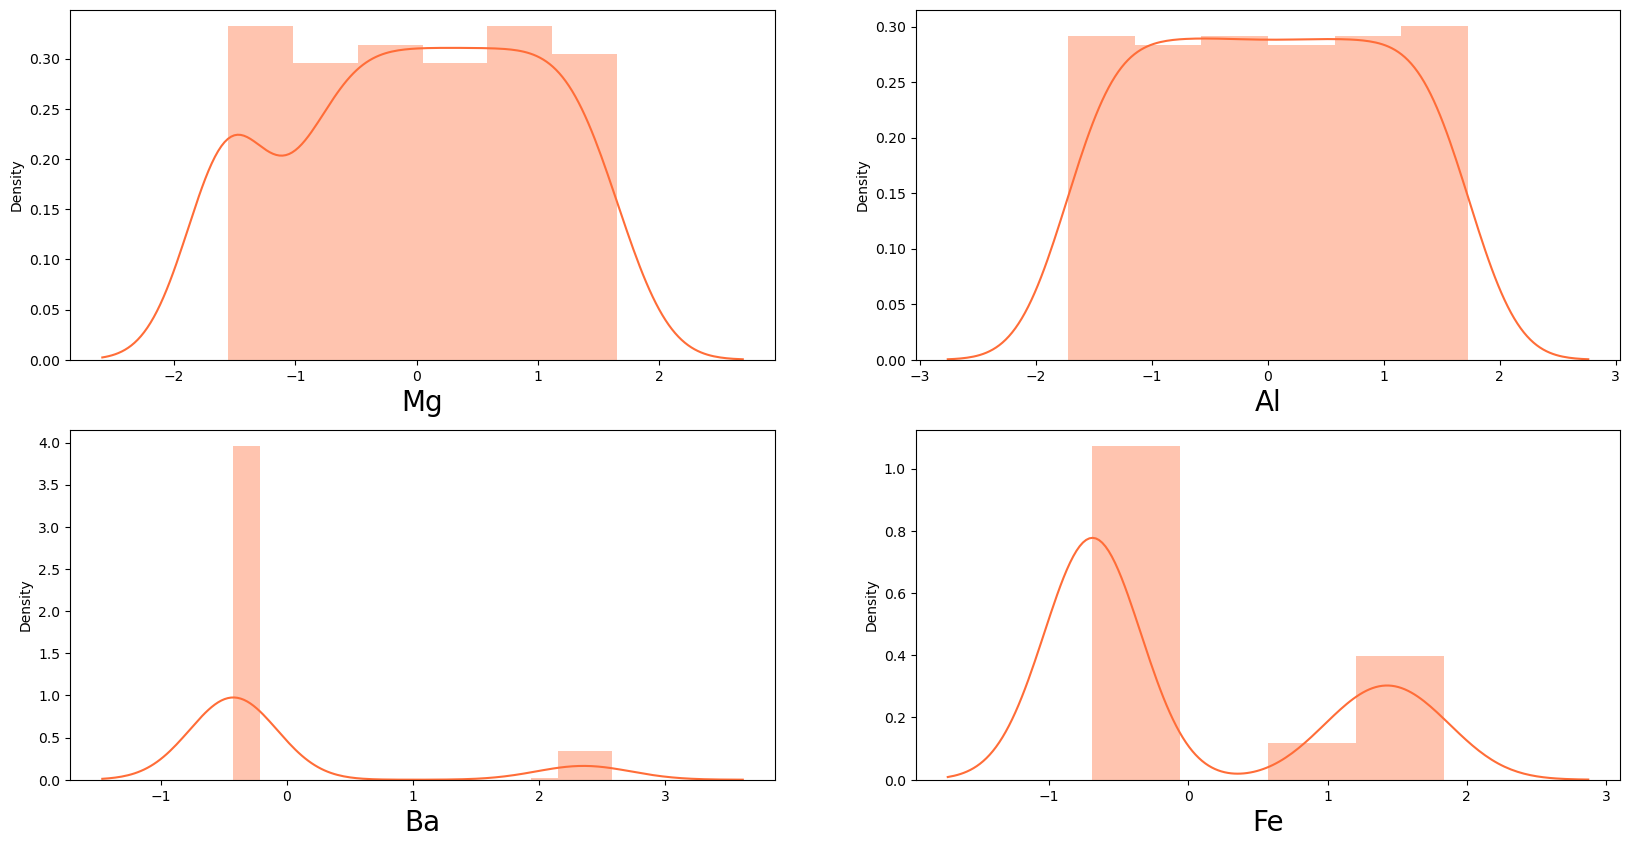

In [82]:
# Visually checking the distribution plots after scaling the data
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# SMOTE for classfication

As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable

In [83]:
# Checking the value count of target column
y.value_counts()

0    160
1     43
Name: Type of glass, dtype: int64

In [84]:
x.shape

(203, 4)

In [85]:
y.shape

(203,)

In [86]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [87]:
# Checking the value count of target column
y.value_counts()

0    160
1    160
Name: Type of glass, dtype: int64

#### Observations: 
- **Classes are balanced in the target column**

In [88]:
x.shape

(320, 4)

In [89]:
y.shape

(320,)

0    160
1    160
Name: Type of glass, dtype: int64


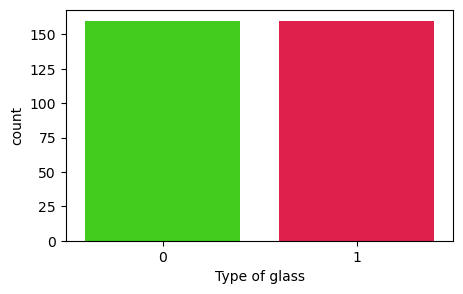

In [90]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

#### EDA part is completed and I will proceed with Model Building

In [91]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

# Model Building

In [92]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
0,16,95.3125,95.3125,0.0


#### Observations: 
- **From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code**

In [93]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

16

#### Observations: 
- **Considering random state=16 for the model building**

In [94]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [95]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.953125


In [96]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.97      0.94      0.95        33

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



In [97]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[30  1]
 [ 2 31]]


# Cross Validation for Logistic Regression

In [98]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
6,8,94.375000,95.3125,0.009375
2,4,94.375000,95.3125,0.009375
3,5,94.375000,95.3125,0.009375
7,9,94.329806,95.3125,0.009827
5,7,94.071774,95.3125,0.012407
8,10,94.062500,95.3125,0.012500
1,3,94.054547,95.3125,0.012580
4,6,94.042628,95.3125,0.012699
0,2,92.812500,95.3125,0.025000


#### Observations: 
- **Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=8 from the above table**

In [99]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

8

In [100]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 94.37500000000001 
The accuracy score is: 95.3125
Difference is: 0.009374999999999911


# Other Classification Algorithms

In [101]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
95.3125
Confusion Matrix:
[[30  1]
 [ 2 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.97      0.94      0.95        33

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
95.3125
Confusion Matrix:
[[30  1]
 [ 2 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.97      0.94      0.95        33

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64

------------------------------------------------------------
Mo

,Model,Model Score,Cross Validation Score,Difference
5,SVC(),95.3125,95.3125,0.000000
10,XGBClassifier(),95.3125,95.0000,0.003125
3,KNeighborsClassifier(),93.7500,93.1250,0.006250
7,ExtraTreesClassifier(),95.3125,94.6875,0.006250
0,LogisticRegression(),95.3125,94.3750,0.009375
8,GradientBoostingClassifier(),95.3125,94.3750,0.009375
9,AdaBoostClassifier(),95.3125,94.3750,0.009375
2,Decision Tree Classifier(),95.3125,94.0625,0.012500
11,VotingClassifier(),95.3125,94.0625,0.012500
6,RandomForestClassifier(),95.3125,93.4375,0.018750


In [102]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference"]==score_table["Difference"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'SVC()'

#### Observations: 
- **Based on the comparison between model score and cross validation scores for multiple models, I have considered "SVC()" is the best model as the difference is least among all the models. Hyper parameter tuning will be pefromed for "SVC()".**

# Hyper Parameter Tuning

In [103]:
# Hyper parameter tuning on SVC()

from sklearn.model_selection import GridSearchCV

# Defining parameters for SVC()
parameters = {
    "C": [0.0001, 0.001, 0.01, 0.1, 0.5, 1,10,100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree":[2,3,4,5],
    "gamma": ["scale", "auto"],
    "random_state":[10,50,1000]
}

In [104]:
GCV=GridSearchCV(SVC(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [105]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [10, 50, 1000]})

In [106]:
GCV.best_params_   # printing the best parameters

{'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 10}

In [107]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=SVC(C=GCV.best_params_['C'],kernel=GCV.best_params_['kernel'],
                                 degree=GCV.best_params_['degree'],gamma=GCV.best_params_['gamma'],
                                 random_state=GCV.best_params_['random_state'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

93.75
[[29  2]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.94      0.94      0.94        33

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



In [108]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 94.0625 
The accuracy score is: 93.75
Difference is: -0.0031250000000000444


#### Observations for Support Vector Classifier: 
- **Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is   -0.003125**
- **Model with default parameters: The difference between Cross Validation Score and model score is  0.000000**
- **As the delta is least in the model with default parameters, considering the model with default parameters as the best model for saving**

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

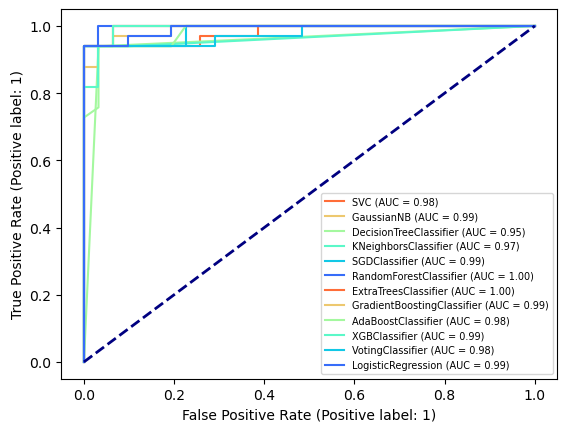

In [111]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for SVC
disp=plot_roc_curve(models[4][1],x_test,y_test)  

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of DecisionTreeClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_) 

plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)

plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[8][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[9][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[10][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

#### Observations:
- **All models are performing well.**
- **RandomForestClassifier and ExtraTreesClassifier are the best one among all models from this plot.** 
- **Support Vector Classifier (SVC) is the best model based on the least difference between model accuracy score & cross validation score and also based on AUC ROC score. Hence saving Support Vector Classifier (SVC) as the final model for deployment**

# Model Saving

In [112]:
import pickle
filename='glass-identification.pkl'
pickle.dump(models[4][1], open(filename,'wb'))  # saving the Decision Tree Classifier model

# Conclusion

In [113]:
loaded_model=pickle.load(open('glass-identification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T

95.3125


,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
59,0,0
60,1,1
61,0,0
62,1,1
